In [171]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

excel = 'C:\\Users\\UsuarioFinal\\Desktop\\IDH_Guanajuato_v2.xlsx'



<font size="5">Para el primer análisis, se busca determinar una relación entre variables independientes y dependientes. </font>


- En primer lugar, se normaliza cada característica dependiente (Total, Máximo, Promedio) dividiéndola por la población, con el objetivo de obtener un valor per cápita para cada característica.

- Posteriormente, se realiza una regresión lineal para cada característica con respecto a las variables independientes (IDH, IE, II, IS) con el fin de observar la relación entre las variables dependientes e independientes mediante graficos de dispersion.

- Estos pasos se llevaran acabo para confirmados, defunciones y recuperados.






En el marco de la regresión lineal simple utilizando Python, la biblioteca `scikit-learn` ofrece el módulo `linear_model` que contiene la clase `LinearRegression`. 

La ecuación de la línea recta se representa como:

$$ y = mx + b $$

Aquí, \( y \) es la variable dependiente, \( m \) es la pendiente de la línea, y \( b \) es el intercepto en el eje y. La clase `LinearRegression` facilita la estimación de estos parámetros.El coeficiente de determinación, también conocido como R cuadrado o R², es una métrica que se utiliza en estadística y aprendizaje automático para evaluar qué tan bien un modelo de regresión se ajusta a los datos observados.

En el contexto de la regresión lineal, R² representa la proporción de la varianza de la variable dependiente que puede ser predicha a partir de la(s) variable(s) independiente(s). Un valor de R² cercano a 1 indica que el modelo puede explicar una gran proporción de la varianza, mientras que un valor cercano a 0 indica que el modelo no puede explicar mucho de la varianza.

Para calcular R² usando scikit-learn, se utiliza el método `score` de un objeto `LinearRegression` ajustado.




### CONFIRMADOS

In [9]:
#Seleccion de columnas para casos confirmados
df_confirmed = pd.read_excel(excel, skiprows = 1, usecols='A, B, C, D, E, F, G, H, I, J')
#Dividir caracteristicas entre poblacion (per capita)
df_confirmed['Total_per_capita'] = df_confirmed['Total']/df_confirmed['POB']         
df_confirmed['Maximo_per_capita'] = df_confirmed['Maximo']/df_confirmed['POB']
df_confirmed['Promedio_per_capita'] = df_confirmed['Promedio']/df_confirmed['POB']
df_confirmed

,MUNICIPIO,IDH,IE,II,IS,POB,CAT_IDH,Total,Maximo,Promedio,Total_per_capita,Maximo_per_capita,Promedio_per_capita
0,Abasolo,0.632,0.451,0.682,0.821,92040,Medio,270,14,1.542857,0.002934,0.000152,0.000017
1,Acámbaro,0.677,0.524,0.721,0.821,108697,Medio,824,48,4.708571,0.007581,0.000442,0.000043
2,Apaseo el Alto,0.658,0.516,0.717,0.771,63392,Medio,195,8,1.114286,0.003076,0.000126,0.000018
3,Apaseo el Grande,0.680,0.525,0.729,0.823,117883,Medio,313,16,1.788571,0.002655,0.000136,0.000015
4,Atarjea,0.600,0.471,0.628,0.731,5296,Medio,4,1,0.022857,0.000755,0.000189,0.000004
5,Celaya,0.753,0.642,0.783,0.850,521169,Alto,3316,80,18.948571,0.006363,0.000154,0.000036
6,Comonfort,0.660,0.516,0.703,0.793,82216,Medio,205,6,1.171429,0.002493,0.000073,0.000014
7,Coroneo,0.639,0.472,0.687,0.804,11083,Medio,71,7,0.405714,0.006406,0.000632,0.000037
8,Cortazar,0.706,0.552,0.733,0.871,97928,Alto,547,17,3.125714,0.005586,0.000174,0.000032
9,Cuerámaro,0.643,0.506,0.686,0.767,30857,Medio,196,10,1.120000,0.006352,0.000324,0.000036


In [10]:
# Creador de modelos de regresion lineal IDH
regresion_Total_per_capita = linear_model.LinearRegression()
regresion_Maximo_per_capita = linear_model.LinearRegression()
regresion_Promedio_per_capita = linear_model.LinearRegression()

# Creador de modelos de regresion lineal IE
regresion_Total_per_capita_IE = linear_model.LinearRegression()
regresion_Maximo_per_capita_IE = linear_model.LinearRegression()
regresion_Promedio_per_capita_IE = linear_model.LinearRegression()

# Creador de modelos de regresion lineal II
regresion_Total_per_capita_II = linear_model.LinearRegression()
regresion_Maximo_per_capita_II = linear_model.LinearRegression()
regresion_Promedio_per_capita_II = linear_model.LinearRegression()

# Creador de modelos de regresion lineal IS
regresion_Total_per_capita_IS = linear_model.LinearRegression()
regresion_Maximo_per_capita_IS = linear_model.LinearRegression()
regresion_Promedio_per_capita_IS = linear_model.LinearRegression()

# Se requiere que cada uno de los datos esté dentro de un vector para ajustarse a sklearn
Total_per_capita = df_confirmed['Total_per_capita'].values.reshape(-1, 1)
Maximo_per_capita = df_confirmed['Maximo_per_capita'].values.reshape(-1, 1)
Promedio_per_capita = df_confirmed['Promedio_per_capita'].values.reshape(-1, 1)
IDH = df_confirmed['IDH'].values.reshape(-1, 1)
IE = df_confirmed['IE'].values.reshape(-1, 1)
II = df_confirmed['II'].values.reshape(-1, 1)
IS = df_confirmed['IS'].values.reshape(-1, 1)

In [11]:
# variable independiente contra variable dependiente
modelo_Total_per_capita = regresion_Total_per_capita.fit(IDH, Total_per_capita)
modelo_Maximo_per_capita = regresion_Maximo_per_capita.fit(IDH, Maximo_per_capita)
modelo_Promedio_per_capita = regresion_Promedio_per_capita.fit(IDH, Promedio_per_capita)

# variable independiente contra variable dependiente
modelo_Total_per_capita_IE = regresion_Total_per_capita_IE.fit(IE, Total_per_capita)
modelo_Maximo_per_capita_IE = regresion_Maximo_per_capita_IE.fit(IE, Maximo_per_capita)
modelo_Promedio_per_capita_IE = regresion_Promedio_per_capita_IE.fit(IE, Promedio_per_capita)

# variable independiente contra variable dependiente
modelo_Total_per_capita_II = regresion_Total_per_capita_II.fit(II, Total_per_capita)
modelo_Maximo_per_capita_II = regresion_Maximo_per_capita_II.fit(II, Maximo_per_capita)
modelo_Promedio_per_capita_II = regresion_Promedio_per_capita_II.fit(II, Promedio_per_capita)

# variable independiente contra variable dependiente
modelo_Total_per_capita_IS = regresion_Total_per_capita_IS.fit(IS, Total_per_capita)
modelo_Maximo_per_capita_IS = regresion_Maximo_per_capita_IS.fit(IS, Maximo_per_capita)
modelo_Promedio_per_capita_IS = regresion_Promedio_per_capita_IS.fit(IS, Promedio_per_capita)

# IMPRIMIR LOS RESULTADOS

# Modelo para IDH
print("Modelo Total per capita IDH: Intersección (b) =", modelo_Total_per_capita.intercept_, "Pendiente =", modelo_Total_per_capita.coef_)
print("R2:", r2_score(Total_per_capita, modelo_Total_per_capita.predict(IDH)))

print("Modelo Máximo per capita IDH: Intersección (b) =", modelo_Maximo_per_capita.intercept_, "Pendiente =", modelo_Maximo_per_capita.coef_)
print("R2:", r2_score(Maximo_per_capita, modelo_Maximo_per_capita.predict(IDH)))

print("Modelo Promedio per capita IDH: Intersección (b) =", modelo_Promedio_per_capita.intercept_, "Pendiente =", modelo_Promedio_per_capita.coef_)
print("R2:", r2_score(Promedio_per_capita, modelo_Promedio_per_capita.predict(IDH)))

# Modelo para IE
print("Modelo Total per capita IE: Intersección (b) =", modelo_Total_per_capita_IE.intercept_, "Pendiente =", modelo_Total_per_capita_IE.coef_)
print("R2:", r2_score(Total_per_capita, modelo_Total_per_capita_IE.predict(IE)))

print("Modelo Máximo per capita IE: Intersección (b) =", modelo_Maximo_per_capita_IE.intercept_, "Pendiente =", modelo_Maximo_per_capita_IE.coef_)
print("R2:", r2_score(Maximo_per_capita, modelo_Maximo_per_capita_IE.predict(IE)))

print("Modelo Promedio per capita IE: Intersección (b) =", modelo_Promedio_per_capita_IE.intercept_, "Pendiente =", modelo_Promedio_per_capita_IE.coef_)
print("R2:", r2_score(Promedio_per_capita, modelo_Promedio_per_capita_IE.predict(IE)))

# Modelo para II
print("Modelo Total per capita II: Intersección (b) =", modelo_Total_per_capita_II.intercept_, "Pendiente =", modelo_Total_per_capita_II.coef_)
print("R2:", r2_score(Total_per_capita, modelo_Total_per_capita_II.predict(II)))

print("Modelo Máximo per capita II: Intersección (b) =", modelo_Maximo_per_capita_II.intercept_, "Pendiente =", modelo_Maximo_per_capita_II.coef_)
print("R2:", r2_score(Maximo_per_capita, modelo_Maximo_per_capita_II.predict(II)))

print("Modelo Promedio per capita II: Intersección (b) =", modelo_Promedio_per_capita_II.intercept_, "Pendiente =", modelo_Promedio_per_capita_II.coef_)
print("R2:", r2_score(Promedio_per_capita, modelo_Promedio_per_capita_II.predict(II)))

# Modelo para IS
print("Modelo Total per capita IS: Intersección (b) =", modelo_Total_per_capita_IS.intercept_, "Pendiente =", modelo_Total_per_capita_IS.coef_)
print("R2:", r2_score(Total_per_capita, modelo_Total_per_capita_IS.predict(IS)))

print("Modelo Máximo per capita IS: Intersección (b) =", modelo_Maximo_per_capita_IS.intercept_, "Pendiente =", modelo_Maximo_per_capita_IS.coef_)
print("R2:", r2_score(Maximo_per_capita, modelo_Maximo_per_capita_IS.predict(IS)))

print("Modelo Promedio per capita IS: Intersección (b) =", modelo_Promedio_per_capita_IS.intercept_, "Pendiente =", modelo_Promedio_per_capita_IS.coef_)
print("R2:", r2_score(Promedio_per_capita, modelo_Promedio_per_capita_IS.predict(IS)))


Modelo Total per capita IDH: Intersección (b) = [-0.00881451] Pendiente = [[0.02128239]]
R2: 0.15577078104073128
Modelo Máximo per capita IDH: Intersección (b) = [0.00073003] Pendiente = [[-0.0006727]]
R2: 0.0217946252190665
Modelo Promedio per capita IDH: Intersección (b) = [-5.03686245e-05] Pendiente = [[0.00012161]]
R2: 0.15577078104073128
Modelo Total per capita IE: Intersección (b) = [-0.00156531] Pendiente = [[0.01338859]]
R2: 0.08325632930552929
Modelo Máximo per capita IE: Intersección (b) = [0.00058476] Pendiente = [[-0.00058701]]
R2: 0.02241303826637009
Modelo Promedio per capita IE: Intersección (b) = [-8.94464351e-06] Pendiente = [[7.65062378e-05]]
R2: 0.08325632930552918
Modelo Total per capita II: Intersección (b) = [-0.01580597] Pendiente = [[0.02978569]]
R2: 0.2709871052462228
Modelo Máximo per capita II: Intersección (b) = [0.00036198] Pendiente = [[-0.00010977]]
R2: 0.0005154087015271092
Modelo Promedio per capita II: Intersección (b) = [-9.03198355e-05] Pendiente = [

## Análisis de Casos Confirmados

### En el análisis de casos confirmados, los bajos valores de R² (menores a 0.3) indican una débil relación entre variables dependientes e independientes. 

### En las siguientes graficas de dispersion se observa el modelo.


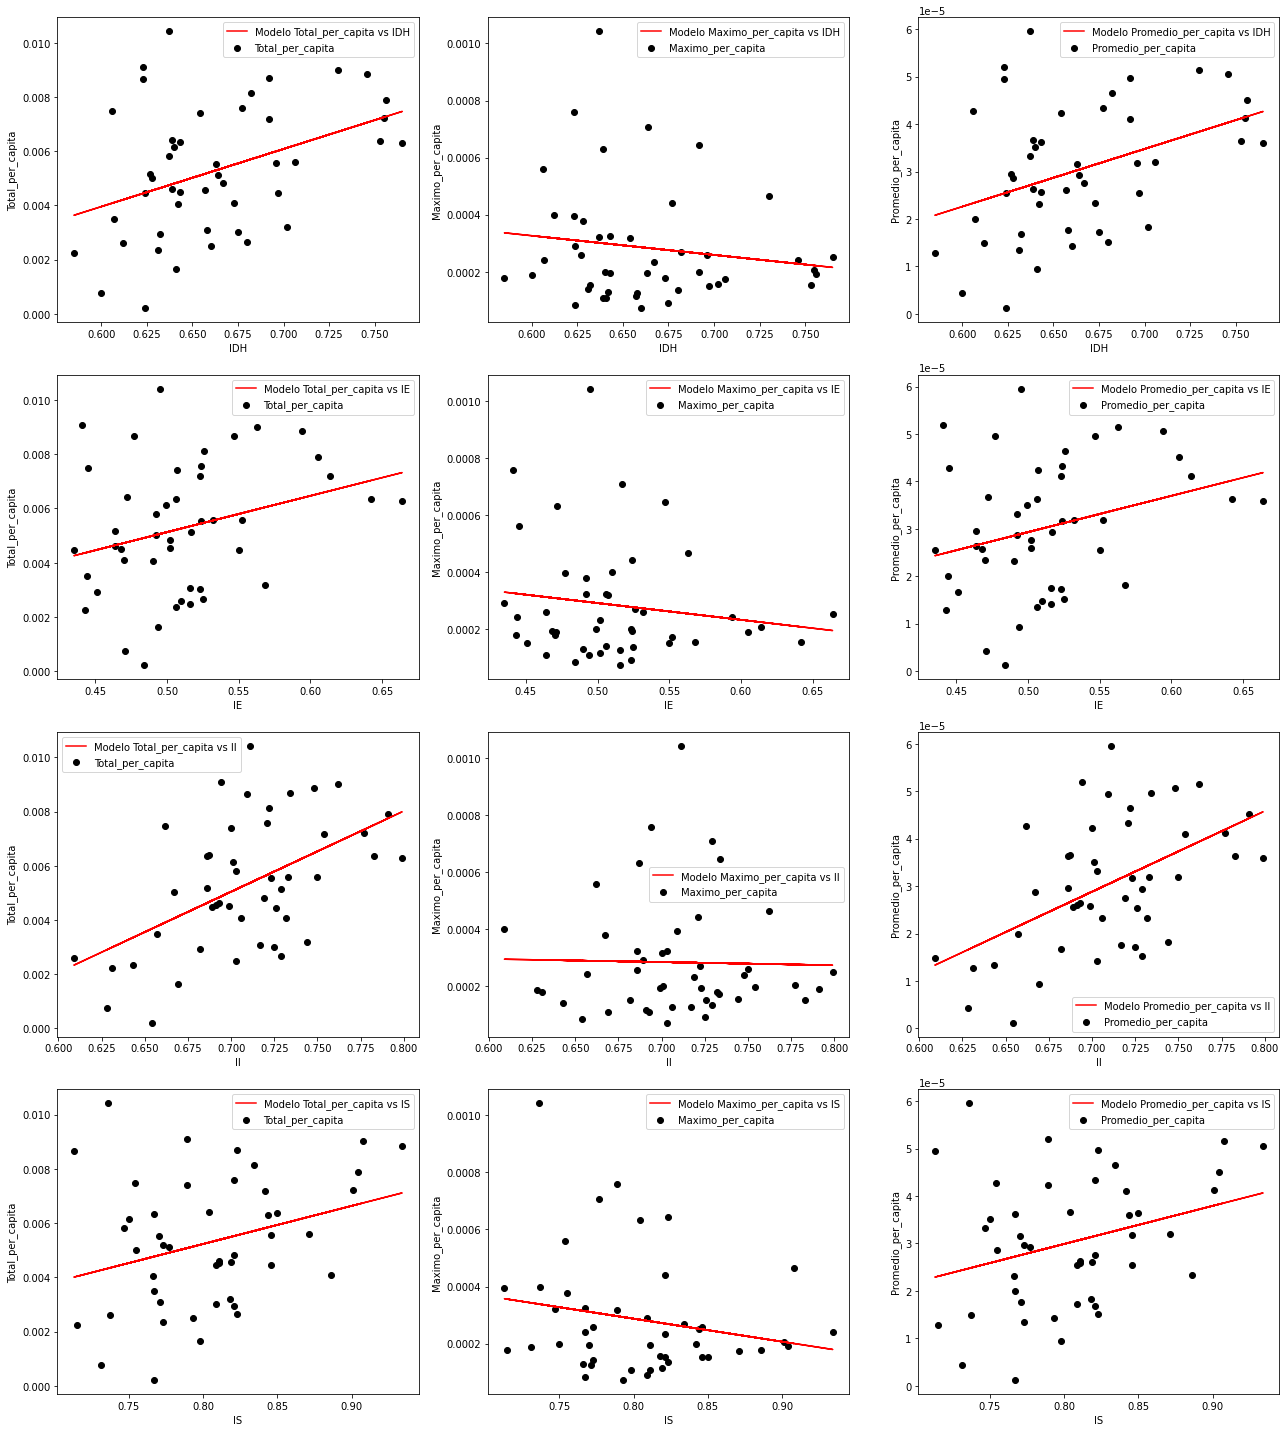

In [12]:
# Crear una figura y subgráficos en una fila
fig, axes = plt.subplots(4, 3, figsize=(18, 20))

# Definir las variables
variables = ['Total_per_capita', 'Maximo_per_capita', 'Promedio_per_capita']
modelos_IDH = [modelo_Total_per_capita, modelo_Maximo_per_capita, modelo_Promedio_per_capita]
modelos_IE = [modelo_Total_per_capita_IE, modelo_Maximo_per_capita_IE, modelo_Promedio_per_capita_IE]
modelos_II = [modelo_Total_per_capita_II, modelo_Maximo_per_capita_II, modelo_Promedio_per_capita_II]
modelos_IS = [modelo_Total_per_capita_IS, modelo_Maximo_per_capita_IS, modelo_Promedio_per_capita_IS]
modelos = [modelos_IDH, modelos_IE, modelos_II, modelos_IS]
variables_independientes = [IDH, IE, II, IS]
nombres_variables_independientes = ['IDH', 'IE', 'II', 'IS']

# Iterar sobre las variables y modelos
for i, (variable_independiente, modelo, nombre_variable_independiente) in enumerate(zip(variables_independientes, modelos, nombres_variables_independientes)):
    for j, (variable, modelo_individual) in enumerate(zip(variables, modelo)):
        # Graficar los puntos de datos
        axes[i, j].scatter(variable_independiente, df_confirmed[variable], color='black', label=variable)

        # Graficar el modelo ajustado
        axes[i, j].plot(variable_independiente, modelo_individual.predict(variable_independiente), color='red', label=f'Modelo {variable} vs {nombre_variable_independiente}')

        # Configurar etiquetas y leyenda para cada subgráfico
        axes[i, j].set_xlabel(nombre_variable_independiente)
        axes[i, j].set_ylabel(variable)
        axes[i, j].legend()

# Ajustar diseño para evitar solapamiento
plt.tight_layout()

# Mostrar la gráfica
plt.show()


# DEFUNCIONES

In [41]:
df_deaths = pd.read_excel(excel, skiprows = 1, usecols = 'A, B, C, D, E, F, G, K, L, M')
df_deaths['Total_per_capita_deaths'] = df_deaths['Total.1'] / df_deaths['POB']
df_deaths['Maximo_per_capita_deaths'] = df_deaths['Maximo.1'] / df_deaths['POB']
df_deaths['Promedio_per_capita_deaths'] = df_deaths['Promedio.1'] / df_deaths['POB']
df_deaths.head(10)


,MUNICIPIO,IDH,IE,II,IS,POB,CAT_IDH,Total.1,Maximo.1,Promedio.1,Total_per_capita_deaths,Maximo_per_capita_deaths,Promedio_per_capita_deaths
0,Abasolo,0.632,0.451,0.682,0.821,92040,Medio,13,3,0.074286,0.000141,0.000033,8.071025e-07
1,Acámbaro,0.677,0.524,0.721,0.821,108697,Medio,31,3,0.177143,0.000285,0.000028,1.629694e-06
2,Apaseo el Alto,0.658,0.516,0.717,0.771,63392,Medio,10,2,0.057143,0.000158,0.000032,9.014206e-07
3,Apaseo el Grande,0.680,0.525,0.729,0.823,117883,Medio,20,3,0.114286,0.000170,0.000025,9.694843e-07
4,Atarjea,0.600,0.471,0.628,0.731,5296,Medio,0,0,0.000000,0.000000,0.000000,0.000000e+00
5,Celaya,0.753,0.642,0.783,0.850,521169,Alto,219,10,1.251429,0.000420,0.000019,2.401195e-06
6,Comonfort,0.660,0.516,0.703,0.793,82216,Medio,12,2,0.068571,0.000146,0.000024,8.340400e-07
7,Coroneo,0.639,0.472,0.687,0.804,11083,Medio,0,0,0.000000,0.000000,0.000000,0.000000e+00
8,Cortazar,0.706,0.552,0.733,0.871,97928,Alto,49,4,0.280000,0.000500,0.000041,2.859244e-06
9,Cuerámaro,0.643,0.506,0.686,0.767,30857,Medio,4,1,0.022857,0.000130,0.000032,7.407442e-07


In [14]:


# Crear modelos para IDH
regresion_Totalpc_deaths = linear_model.LinearRegression()
regresion_Maximopc_deaths = linear_model.LinearRegression()
regresion_Promediopc_deaths = linear_model.LinearRegression()

# Crear modelos para IE
regresion_Totalpc_deaths_IE = linear_model.LinearRegression()
regresion_Maximopc_deaths_IE = linear_model.LinearRegression()
regresion_Promediopc_deaths_IE = linear_model.LinearRegression()

# Crear modelos para II
regresion_Totalpc_deaths_II = linear_model.LinearRegression()
regresion_Maximopc_deaths_II = linear_model.LinearRegression()
regresion_Promediopc_deaths_II = linear_model.LinearRegression()

# Crear modelos para IS
regresion_Totalpc_deaths_IS = linear_model.LinearRegression()
regresion_Maximopc_deaths_IS = linear_model.LinearRegression()
regresion_Promediopc_deaths_IS = linear_model.LinearRegression()

# Definir vectores
Totalpc_deaths = df_deaths['Total_per_capita_deaths'].values.reshape(-1, 1)
Maximopc_deaths = df_deaths['Maximo_per_capita_deaths'].values.reshape(-1, 1)
Promediopc_deaths = df_deaths['Promedio_per_capita_deaths'].values.reshape(-1, 1)

# Ajustar modelos a los datos para IDH
modelo_Totalpc_deaths = regresion_Totalpc_deaths.fit(IDH, Totalpc_deaths)
modelo_Maximopc_deaths = regresion_Maximopc_deaths.fit(IDH, Maximopc_deaths)
modelo_Promediopc_deaths = regresion_Promediopc_deaths.fit(IDH, Promediopc_deaths)

# Ajustar modelos a los datos para IE
modelo_Totalpc_deaths_IE = regresion_Totalpc_deaths_IE.fit(IE, Totalpc_deaths)
modelo_Maximopc_deaths_IE = regresion_Maximopc_deaths_IE.fit(IE, Maximopc_deaths)
modelo_Promediopc_deaths_IE = regresion_Promediopc_deaths_IE.fit(IE, Promediopc_deaths)

# Ajustar modelos a los datos para II
modelo_Totalpc_deaths_II = regresion_Totalpc_deaths_II.fit(II, Totalpc_deaths)
modelo_Maximopc_deaths_II = regresion_Maximopc_deaths_II.fit(II, Maximopc_deaths)
modelo_Promediopc_deaths_II = regresion_Promediopc_deaths_II.fit(II, Promediopc_deaths)

# Ajustar modelos a los datos para IS
modelo_Totalpc_deaths_IS = regresion_Totalpc_deaths_IS.fit(IS, Totalpc_deaths)
modelo_Maximopc_deaths_IS = regresion_Maximopc_deaths_IS.fit(IS, Maximopc_deaths)
modelo_Promediopc_deaths_IS = regresion_Promediopc_deaths_IS.fit(IS, Promediopc_deaths)

# Imprimir resultados para el modelo con IDH
print("Resultados para el modelo con IDH:")
print("Modelo Total per capita_deaths - IDH: Intersección (b):", modelo_Totalpc_deaths.intercept_, "Pendiente:", modelo_Totalpc_deaths.coef_)
print("R2:", r2_score(Totalpc_deaths, modelo_Totalpc_deaths.predict(IDH)))

print("Modelo Maximopc de deaths - IDH: Intersección (b):", modelo_Maximopc_deaths.intercept_, "Pendiente:", modelo_Maximopc_deaths.coef_)
print("R2:", r2_score(Maximopc_deaths, modelo_Maximopc_deaths.predict(IDH)))

print("Modelo Promediopc de deaths - IDH: Intersección (b):", modelo_Promediopc_deaths.intercept_, "Pendiente:", modelo_Promediopc_deaths.coef_)
print("R2:", r2_score(Promediopc_deaths, modelo_Promediopc_deaths.predict(IDH)))

# Imprimir resultados para el modelo con IE
print("\nResultados para el modelo con IE:")
print("Modelo Total per capita_deaths - IE: Intersección (b):", modelo_Totalpc_deaths_IE.intercept_, "Pendiente:", modelo_Totalpc_deaths_IE.coef_)
print("R2:", r2_score(Totalpc_deaths, modelo_Totalpc_deaths_IE.predict(IE)))

print("Modelo Maximopc de deaths - IE: Intersección (b):", modelo_Maximopc_deaths_IE.intercept_, "Pendiente:", modelo_Maximopc_deaths_IE.coef_)
print("R2:", r2_score(Maximopc_deaths, modelo_Maximopc_deaths_IE.predict(IE)))

print("Modelo Promediopc de deaths - IE: Intersección (b):", modelo_Promediopc_deaths_IE.intercept_, "Pendiente:", modelo_Promediopc_deaths_IE.coef_)
print("R2:", r2_score(Promediopc_deaths, modelo_Promediopc_deaths_IE.predict(IE)))

# Imprimir resultados para el modelo con II
print("\nResultados para el modelo con II:")
print("Modelo Total per capita_deaths - II: Intersección (b):", modelo_Totalpc_deaths_II.intercept_, "Pendiente:", modelo_Totalpc_deaths_II.coef_)
print("R2:", r2_score(Totalpc_deaths, modelo_Totalpc_deaths_II.predict(II)))

print("Modelo Maximopc de deaths - II: Intersección (b):", modelo_Maximopc_deaths_II.intercept_, "Pendiente:", modelo_Maximopc_deaths_II.coef_)
print("R2:", r2_score(Maximopc_deaths, modelo_Maximopc_deaths_II.predict(II)))

print("Modelo Promediopc de deaths - II: Intersección (b):", modelo_Promediopc_deaths_II.intercept_, "Pendiente:", modelo_Promediopc_deaths_II.coef_)
print("R2:", r2_score(Promediopc_deaths, modelo_Promediopc_deaths_II.predict(II)))

# Imprimir resultados para el modelo con IS
print("\nResultados para el modelo con IS:")
print("Modelo Total per capita_deaths - IS: Intersección (b):", modelo_Totalpc_deaths_IS.intercept_, "Pendiente:", modelo_Totalpc_deaths_IS.coef_)
print("R2:", r2_score(Totalpc_deaths, modelo_Totalpc_deaths_IS.predict(IS)))

print("Modelo Maximopc de deaths - IS: Intersección (b):", modelo_Maximopc_deaths_IS.intercept_, "Pendiente:", modelo_Maximopc_deaths_IS.coef_)
print("R2:", r2_score(Maximopc_deaths, modelo_Maximopc_deaths_IS.predict(IS)))

print("Modelo Promediopc de deaths - IS: Intersección (b):", modelo_Promediopc_deaths_IS.intercept_, "Pendiente:", modelo_Promediopc_deaths_IS.coef_)
print("R2:", r2_score(Promediopc_deaths, modelo_Promediopc_deaths_IS.predict(IS)))



Resultados para el modelo con IDH:
Modelo Total per capita_deaths - IDH: Intersección (b): [-0.00098492] Pendiente: [[0.00185382]]
R2: 0.24867859716128338
Modelo Maximopc de deaths - IDH: Intersección (b): [0.00011106] Pendiente: [[-0.0001127]]
R2: 0.02872816680078505
Modelo Promediopc de deaths - IDH: Intersección (b): [-5.62808911e-06] Pendiente: [[1.05932558e-05]]
R2: 0.24867859716128293

Resultados para el modelo con IE:
Modelo Total per capita_deaths - IE: Intersección (b): [-0.00051782] Pendiente: [[0.00148727]]
R2: 0.21616397853561675
Modelo Maximopc de deaths - IE: Intersección (b): [6.81045993e-05] Pendiente: [[-6.1984726e-05]]
R2: 0.011736112220578243
Modelo Promediopc de deaths - IE: Intersección (b): [-2.95897847e-06] Pendiente: [[8.49866781e-06]]
R2: 0.21616397853561653

Resultados para el modelo con II:
Modelo Total per capita_deaths - II: Intersección (b): [-0.00113516] Pendiente: [[0.00194675]]
R2: 0.24356259963275484
Modelo Maximopc de deaths - II: Intersección (b): [8

## Análisis de Casos Defunciones

### En el análisis de defunciones, los bajos valores de R² (menores a 0.3) indican una débil relación entre variables dependientes e independientes.


### En las siguientes graficas de dispersion se observa el modelo.

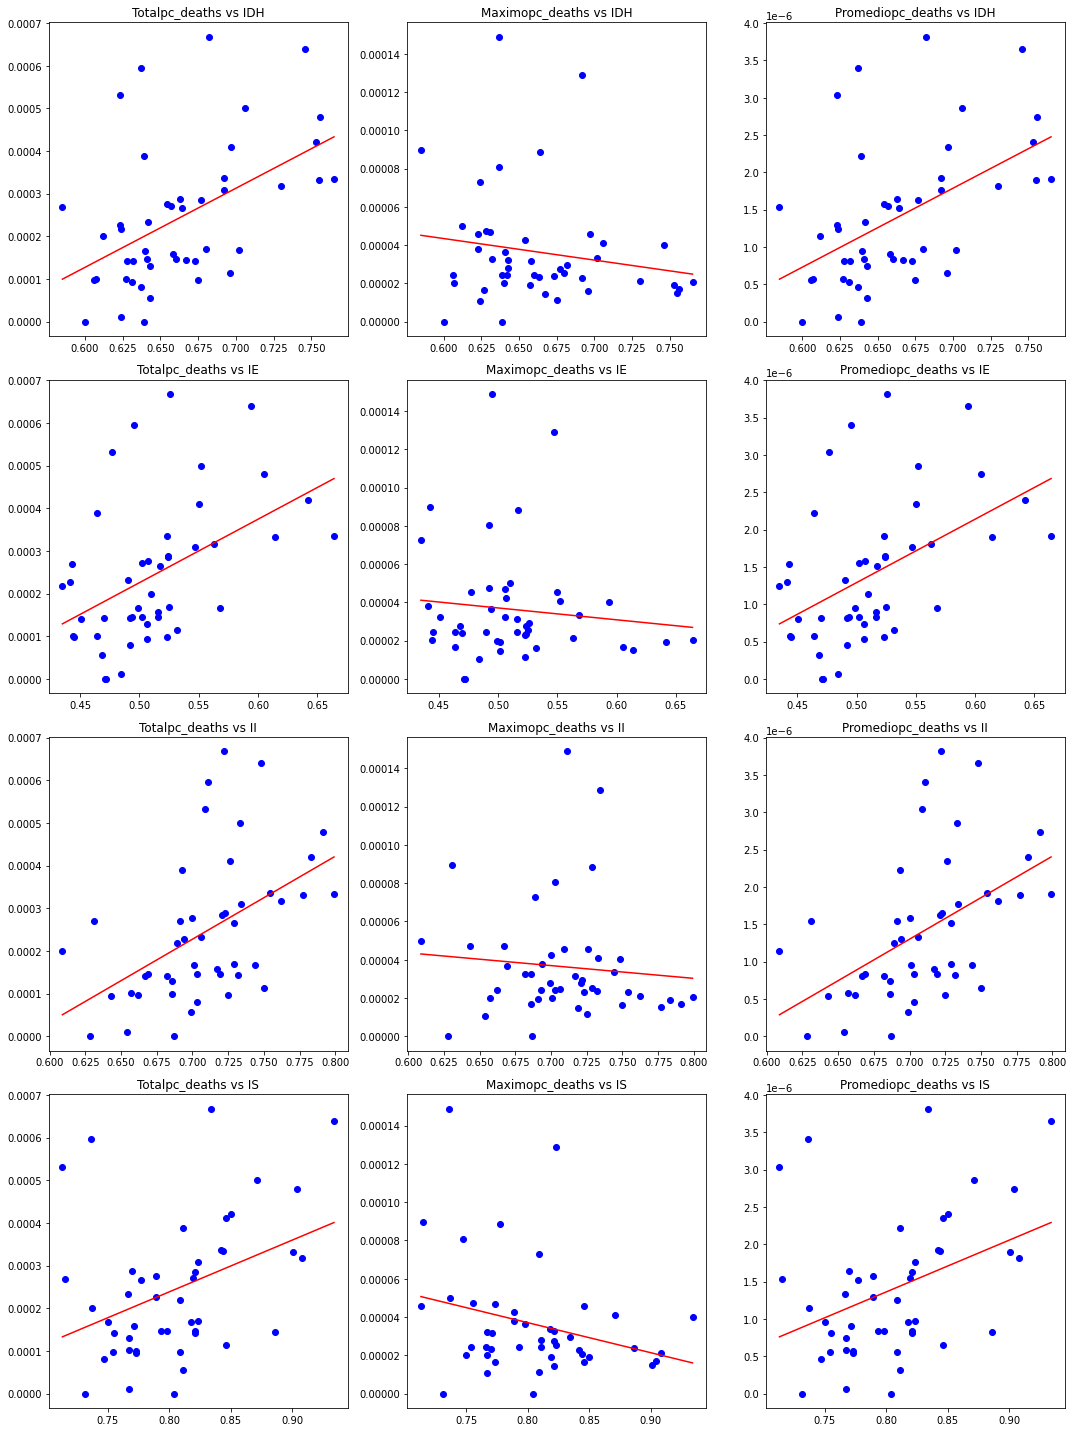

In [42]:
import numpy as np

IDH_range = np.linspace(IDH.min(), IDH.max()).reshape(-1,1)
IE_range = np.linspace(IE.min(), IE.max()).reshape(-1,1)
II_range = np.linspace(II.min(), II.max()).reshape(-1,1)
IS_range = np.linspace(IS.min(), IS.max()).reshape(-1,1)

# Crear figuras
fig, axs = plt.subplots(4, 3, figsize=(15, 20))

# Graficar modelos para IDH
axs[0, 0].scatter(IDH, Totalpc_deaths, color='blue')
axs[0, 0].plot(IDH_range, modelo_Totalpc_deaths.predict(IDH_range), color='red')
axs[0, 0].set_title('Totalpc_deaths vs IDH')

axs[0, 1].scatter(IDH, Maximopc_deaths, color='blue')
axs[0, 1].plot(IDH_range, modelo_Maximopc_deaths.predict(IDH_range), color='red')
axs[0, 1].set_title('Maximopc_deaths vs IDH')

axs[0, 2].scatter(IDH, Promediopc_deaths, color='blue')
axs[0, 2].plot(IDH_range, modelo_Promediopc_deaths.predict(IDH_range), color='red')
axs[0, 2].set_title('Promediopc_deaths vs IDH')

# Graficar modelos para IE
axs[1, 0].scatter(IE, Totalpc_deaths, color='blue')
axs[1, 0].plot(IE_range, modelo_Totalpc_deaths_IE.predict(IE_range), color='red')
axs[1, 0].set_title('Totalpc_deaths vs IE')

axs[1, 1].scatter(IE, Maximopc_deaths, color='blue')
axs[1, 1].plot(IE_range, modelo_Maximopc_deaths_IE.predict(IE_range), color='red')
axs[1, 1].set_title('Maximopc_deaths vs IE')

axs[1, 2].scatter(IE, Promediopc_deaths, color='blue')
axs[1, 2].plot(IE_range, modelo_Promediopc_deaths_IE.predict(IE_range), color='red')
axs[1, 2].set_title('Promediopc_deaths vs IE')

# Graficar modelos para II
axs[2, 0].scatter(II, Totalpc_deaths, color='blue')
axs[2, 0].plot(II_range, modelo_Totalpc_deaths_II.predict(II_range), color='red')
axs[2, 0].set_title('Totalpc_deaths vs II')

axs[2, 1].scatter(II, Maximopc_deaths, color='blue')
axs[2, 1].plot(II_range, modelo_Maximopc_deaths_II.predict(II_range), color='red')
axs[2, 1].set_title('Maximopc_deaths vs II')

axs[2, 2].scatter(II, Promediopc_deaths, color='blue')
axs[2, 2].plot(II_range, modelo_Promediopc_deaths_II.predict(II_range), color='red')
axs[2, 2].set_title('Promediopc_deaths vs II')

# Graficar modelos para IS
axs[3, 0].scatter(IS, Totalpc_deaths, color='blue')
axs[3, 0].plot(IS_range, modelo_Totalpc_deaths_IS.predict(IS_range), color='red')
axs[3, 0].set_title('Totalpc_deaths vs IS')

axs[3, 1].scatter(IS, Maximopc_deaths, color='blue')
axs[3, 1].plot(IS_range, modelo_Maximopc_deaths_IS.predict(IS_range), color='red')
axs[3, 1].set_title('Maximopc_deaths vs IS')

axs[3, 2].scatter(IS, Promediopc_deaths, color='blue')
axs[3, 2].plot(IS_range, modelo_Promediopc_deaths_IS.predict(IS_range), color='red')
axs[3, 2].set_title('Promediopc_deaths vs IS')

# Ajustar espaciado
plt.tight_layout()
plt.show()


# RECUPERADOS

In [43]:
df_recovered = pd.read_excel(excel, skiprows=1, usecols='A, B, C, D, E, F, G, N, O, P')
#Dividir caracteristicas entre poblacion (per capita)
df_recovered['Total_per_capita_recovered'] = df_recovered['Total.2'] / df_recovered['POB']
df_recovered['Maximo_per_capita_recovered'] = df_recovered['Maximo.2'] / df_recovered['POB']
df_recovered['Promedio_per_capita_recovered'] = df_recovered['Promedio.2'] / df_recovered['POB']
df_recovered.head(5)


,MUNICIPIO,IDH,IE,II,IS,POB,CAT_IDH,Total.2,Maximo.2,Promedio.2,Total_per_capita_recovered,Maximo_per_capita_recovered,Promedio_per_capita_recovered
0,Abasolo,0.632,0.451,0.682,0.821,92040,Medio,0,0,0.0,0.0,0.0,0.0
1,Acámbaro,0.677,0.524,0.721,0.821,108697,Medio,0,0,0.0,0.0,0.0,0.0
2,Apaseo el Alto,0.658,0.516,0.717,0.771,63392,Medio,0,0,0.0,0.0,0.0,0.0
3,Apaseo el Grande,0.680,0.525,0.729,0.823,117883,Medio,0,0,0.0,0.0,0.0,0.0
4,Atarjea,0.600,0.471,0.628,0.731,5296,Medio,0,0,0.0,0.0,0.0,0.0


In [17]:
# Define linear regression models for each dataset
regresion_Totalpc_recovered_IDH = linear_model.LinearRegression()
regresion_Maximopc_recovered_IDH = linear_model.LinearRegression()
regresion_Promediopc_recovered_IDH = linear_model.LinearRegression()

regresion_Totalpc_recovered_IE = linear_model.LinearRegression()
regresion_Maximopc_recovered_IE = linear_model.LinearRegression()
regresion_Promediopc_recovered_IE = linear_model.LinearRegression()

regresion_Totalpc_recovered_II = linear_model.LinearRegression()
regresion_Maximopc_recovered_II = linear_model.LinearRegression()
regresion_Promediopc_recovered_II = linear_model.LinearRegression()

regresion_Totalpc_recovered_IS = linear_model.LinearRegression()
regresion_Maximopc_recovered_IS = linear_model.LinearRegression()
regresion_Promediopc_recovered_IS = linear_model.LinearRegression()

# Define vectors
Totalpc_recovered = df_recovered['Total_per_capita_recovered'].values.reshape(-1,1)
Maximopc_recovered = df_recovered['Maximo_per_capita_recovered'].values.reshape(-1,1)
Promediopc_recovered = df_recovered['Promedio_per_capita_recovered'].values.reshape(-1,1)

# Fit models to the IDH dataset
modelo_Totalpc_recovered_IDH = regresion_Totalpc_recovered_IDH.fit(IDH, Totalpc_recovered)
modelo_Maximopc_recovered_IDH = regresion_Maximopc_recovered_IDH.fit(IDH, Maximopc_recovered)
modelo_Promediopc_recovered_IDH = regresion_Promediopc_recovered_IDH.fit(IDH, Promediopc_recovered)

# Fit models to the IE dataset
modelo_Totalpc_recovered_IE = regresion_Totalpc_recovered_IE.fit(IE, Totalpc_recovered)
modelo_Maximopc_recovered_IE = regresion_Maximopc_recovered_IE.fit(IE, Maximopc_recovered)
modelo_Promediopc_recovered_IE = regresion_Promediopc_recovered_IE.fit(IE, Promediopc_recovered)

# Fit models to the II dataset
modelo_Totalpc_recovered_II = regresion_Totalpc_recovered_II.fit(II, Totalpc_recovered)
modelo_Maximopc_recovered_II = regresion_Maximopc_recovered_II.fit(II, Maximopc_recovered)
modelo_Promediopc_recovered_II = regresion_Promediopc_recovered_II.fit(II, Promediopc_recovered)

# Fit models to the IS dataset
modelo_Totalpc_recovered_IS = regresion_Totalpc_recovered_IS.fit(IS, Totalpc_recovered)
modelo_Maximopc_recovered_IS = regresion_Maximopc_recovered_IS.fit(IS, Maximopc_recovered)
modelo_Promediopc_recovered_IS = regresion_Promediopc_recovered_IS.fit(IS, Promediopc_recovered)


#imprimir
print("Modelo Total per capita_recovered IDH",("interseccion(b)", modelo_Totalpc_recovered_IDH.intercept_),("pendiente", modelo_Totalpc_recovered_IDH.coef_))
print( "R2", r2_score(Totalpc_recovered, modelo_Totalpc_recovered_IDH.predict(IDH)))
print("Modelo Maximo per capita_recovered IDH",("interseccion(b)", modelo_Maximopc_recovered_IDH.intercept_),("pendiente", modelo_Maximopc_recovered_IDH.coef_))
print( "R2", r2_score(Maximopc_recovered, modelo_Maximopc_recovered_IDH.predict(IDH)))
print("Modelo Promedio per capita_recovered IDH",("interseccion(b)", modelo_Promediopc_recovered_IDH.intercept_),("pendiente", modelo_Promediopc_recovered_IDH.coef_))
print( "R2", r2_score(Promediopc_recovered, modelo_Promediopc_recovered_IDH.predict(IDH)))


#imprimir
print("Modelo Total per capita_recovered",("interseccion(b)", modelo_Totalpc_recovered_IE.intercept_),("pendiente", modelo_Totalpc_recovered_IE.coef_))
print( "R2", r2_score(Totalpc_recovered, modelo_Totalpc_recovered_IE.predict(IE)))
print("modelo_Maximo_per_capita_recovered",("interseccion(b)", modelo_Maximopc_recovered_IE.intercept_),("pendiente", modelo_Maximopc_recovered_IE.coef_))
print( "R2", r2_score(Maximopc_recovered, modelo_Maximopc_recovered_IE.predict(IE)))
print("modelo_Promedio_per_capita_recovered",("interseccion(b)", modelo_Promediopc_recovered_IE.intercept_),("pendiente", modelo_Promediopc_recovered_IE.coef_))
print( "R2", r2_score(Promediopc_recovered, modelo_Promediopc_recovered_IE.predict(IE)))

#imprimir
print("Modelo Total per capita_recovered",("interseccion(b)", modelo_Totalpc_recovered_II.intercept_),("pendiente", modelo_Totalpc_recovered_II.coef_))
print( "R2", r2_score(Totalpc_recovered, modelo_Totalpc_recovered_II.predict(II)))
print("modelo_Maximo_per_capita_recovered",("interseccion(b)", modelo_Maximopc_recovered_II.intercept_),("pendiente", modelo_Maximopc_recovered_II.coef_))
print( "R2", r2_score(Maximopc_recovered, modelo_Maximopc_recovered_II.predict(II)))
print("modelo_Promedio_per_capita_recovered",("interseccion(b)", modelo_Promediopc_recovered_II.intercept_),("pendiente", modelo_Promediopc_recovered_II.coef_))
print( "R2", r2_score(Promediopc_recovered, modelo_Promediopc_recovered_II.predict(II)))

#imprimir
print("Modelo Total per capita_recovered",("interseccion(b)", modelo_Totalpc_recovered_IS.intercept_),("pendiente", modelo_Totalpc_recovered_IS.coef_))
print( "R2", r2_score(Totalpc_recovered, modelo_Totalpc_recovered_IS.predict(IS)))
print("modelo_Maximo_per_capita_recovered",("interseccion(b)", modelo_Maximopc_recovered_IS.intercept_),("pendiente", modelo_Maximopc_recovered_IS.coef_))
print( "R2", r2_score(Maximopc_recovered, modelo_Maximopc_recovered_IS.predict(IS)))
print("modelo_Promedio_per_capita_recovered",("interseccion(b)", modelo_Promediopc_recovered_IS.intercept_),("pendiente", modelo_Promediopc_recovered_IS.coef_))
print( "R2", r2_score(Promediopc_recovered, modelo_Promediopc_recovered_IS.predict(IS)))


Modelo Total per capita_recovered IDH ('interseccion(b)', array([-1.72514594])) ('pendiente', array([[2.68075731]]))
R2 0.11888446584654566
Modelo Maximo per capita_recovered IDH ('interseccion(b)', array([-0.03337232])) ('pendiente', array([[0.05186074]]))
R2 0.11949570292830947
Modelo Promedio per capita_recovered IDH ('interseccion(b)', array([-0.00985798])) ('pendiente', array([[0.01531861]]))
R2 0.11888446584654655
Modelo Total per capita_recovered ('interseccion(b)', array([-1.4586575])) ('pendiente', array([[2.94955441]]))
R2 0.19436813389292074
modelo_Maximo_per_capita_recovered ('interseccion(b)', array([-0.02819035])) ('pendiente', array([[0.0570088]]))
R2 0.19501176094082318
modelo_Promedio_per_capita_recovered ('interseccion(b)', array([-0.00833519])) ('pendiente', array([[0.0168546]]))
R2 0.19436813389292096
Modelo Total per capita_recovered ('interseccion(b)', array([-1.84510942])) ('pendiente', array([[2.67775325]]))
R2 0.10535111816040876
modelo_Maximo_per_capita_recove

## Análisis de Casos Recuperados

### En el análisis de recuperados, los bajos valores de R² (menores a 0.2) indican una débil relación entre variables dependientes e independientes.


### En las siguientes graficas de dispersion se observa el modelo.

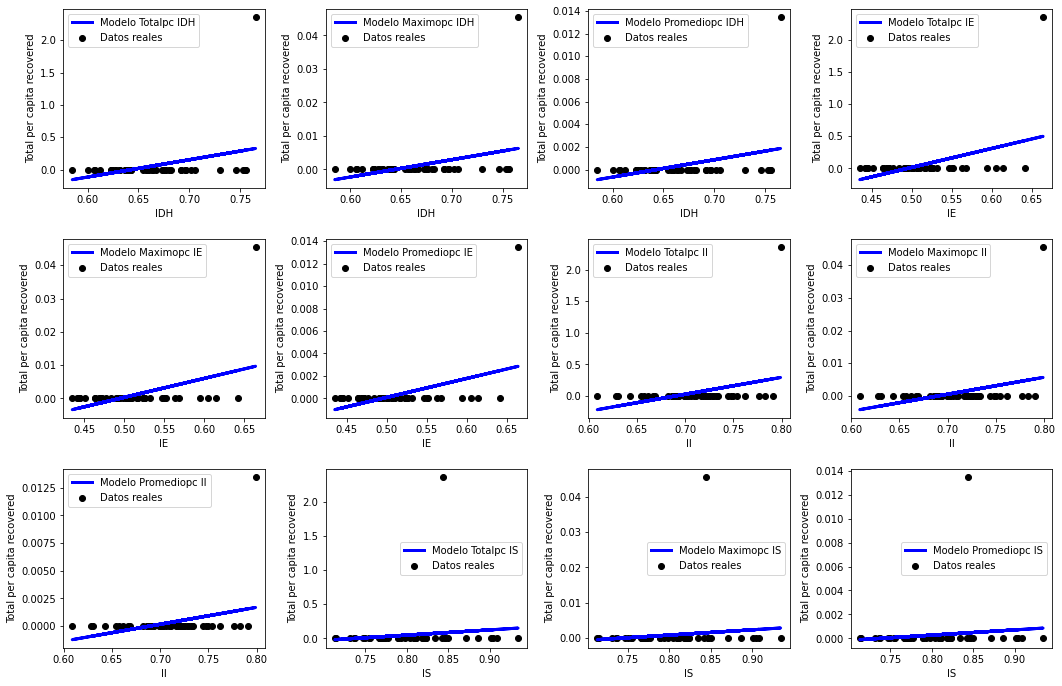

In [18]:
# Define los modelos y nombres
modelos_plots = [modelo_Totalpc_recovered_IDH, modelo_Maximopc_recovered_IDH, modelo_Promediopc_recovered_IDH,
                 modelo_Totalpc_recovered_IE, modelo_Maximopc_recovered_IE, modelo_Promediopc_recovered_IE,
                 modelo_Totalpc_recovered_II, modelo_Maximopc_recovered_II, modelo_Promediopc_recovered_II,
                 modelo_Totalpc_recovered_IS, modelo_Maximopc_recovered_IS, modelo_Promediopc_recovered_IS]

nombres_plots = ['Totalpc IDH', 'Maximopc IDH', 'Promediopc IDH',
                 'Totalpc IE', 'Maximopc IE', 'Promediopc IE',
                 'Totalpc II', 'Maximopc II', 'Promediopc II',
                 'Totalpc IS', 'Maximopc IS', 'Promediopc IS']

# Define los datos y etiquetas
datasets = [IDH, IDH, IDH, IE, IE, IE, II, II, II, IS, IS, IS]
variables_dependientes_plots = [Totalpc_recovered, Maximopc_recovered, Promediopc_recovered,
                                Totalpc_recovered, Maximopc_recovered, Promediopc_recovered,
                                Totalpc_recovered, Maximopc_recovered, Promediopc_recovered,
                                Totalpc_recovered, Maximopc_recovered, Promediopc_recovered]

# Configura la disposición de subplots
fig, axs = plt.subplots(3, 4, figsize=(15, 10))
fig.tight_layout(pad=3.0)

# Grafica los modelos en subplots
for i, ax in enumerate(axs.flat):
    modelo = modelos_plots[i]
    dataset = datasets[i]
    variable_dependiente = variables_dependientes_plots[i]
    nombre = nombres_plots[i]

    ax.scatter(dataset, variable_dependiente, color='black', label='Datos reales')
    ax.plot(dataset, modelo.predict(dataset), color='blue', linewidth=3, label=f'Modelo {nombre}')
    ax.set_xlabel(nombre.split()[1])  # Etiqueta del eje x con el nombre del dataset
    ax.set_ylabel('Total per capita recovered')
    ax.legend()

plt.show()


### Se llevó a cabo un análisis más selectivo al filtrar el CAT_IDH de cada municipio, y se aplicó el mismo análisis con respecto a las variables independientes-dependientes. De manera análoga, se examinaron los datos relacionados con casos confirmados, defunciones y recuperados.

# CONFIRMADOS CAT_IDH ALTO

In [19]:
df_confirmed_alto = df_confirmed[df_confirmed['CAT_IDH'] == "Alto"]
df_confirmed_alto

,MUNICIPIO,IDH,IE,II,IS,POB,CAT_IDH,Total,Maximo,Promedio,Total_per_capita,Maximo_per_capita,Promedio_per_capita
5,Celaya,0.753,0.642,0.783,0.850,521169,Alto,3316,80,18.948571,0.006363,0.000154,0.000036
8,Cortazar,0.706,0.552,0.733,0.871,97928,Alto,547,17,3.125714,0.005586,0.000174,0.000032
12,Guanajuato,0.765,0.664,0.799,0.844,194500,Alto,1223,49,6.988571,0.006288,0.000252,0.000036
14,Irapuato,0.755,0.614,0.777,0.901,592953,Alto,4276,122,24.434286,0.007211,0.000206,0.000041
17,León,0.756,0.605,0.791,0.904,1721215,Alto,13596,328,77.691429,0.007899,0.000191,0.000045
19,Moroleón,0.730,0.563,0.762,0.908,47261,Alto,426,22,2.434286,0.009014,0.000466,0.000052
25,Salamanca,0.746,0.594,0.748,0.934,273417,Alto,2423,66,13.845714,0.008862,0.000241,0.000051
30,San José Iturbide,0.702,0.568,0.744,0.818,89558,Alto,286,14,1.634286,0.003193,0.000156,0.000018


In [20]:
IDH_alto = df_confirmed_alto['IDH'].values.reshape(-1, 1)
IE_alto = df_confirmed_alto['IE'].values.reshape(-1, 1)
II_alto = df_confirmed_alto['II'].values.reshape(-1, 1)
IS_alto = df_confirmed_alto['IS'].values.reshape(-1, 1)

# Se requiere que cada uno de los datos esté dentro de un vector para ajustarse a sklearn
Total_per_capita_alto = df_confirmed_alto['Total_per_capita'].values.reshape(-1, 1)
Maximo_per_capita_alto = df_confirmed_alto['Maximo_per_capita'].values.reshape(-1, 1)
Promedio_per_capita_alto = df_confirmed_alto['Promedio_per_capita'].values.reshape(-1, 1)

# Creador de modelos de regresion lineal IDH
regresion_Total_per_capita_alto = linear_model.LinearRegression()
regresion_Maximo_per_capita_alto = linear_model.LinearRegression()
regresion_Promedio_per_capita_alto = linear_model.LinearRegression()

# Creador de modelos de regresion lineal IE
regresion_Total_per_capita_IE_alto = linear_model.LinearRegression()
regresion_Maximo_per_capita_IE_alto = linear_model.LinearRegression()
regresion_Promedio_per_capita_IE_alto = linear_model.LinearRegression()

# Creador de modelos de regresion lineal II
regresion_Total_per_capita_II_alto = linear_model.LinearRegression()
regresion_Maximo_per_capita_II_alto = linear_model.LinearRegression()
regresion_Promedio_per_capita_II_alto = linear_model.LinearRegression()

# Creador de modelos de regresion lineal IS
regresion_Total_per_capita_IS_alto = linear_model.LinearRegression()
regresion_Maximo_per_capita_IS_alto = linear_model.LinearRegression()
regresion_Promedio_per_capita_IS_alto = linear_model.LinearRegression()


In [21]:
# variable independiente contra variable dependiente
modelo_Total_per_capita_alto = regresion_Total_per_capita_alto.fit(IDH_alto, Total_per_capita_alto)
modelo_Maximo_per_capita_alto = regresion_Maximo_per_capita_alto.fit(IDH_alto, Maximo_per_capita_alto)
modelo_Promedio_per_capita_alto = regresion_Promedio_per_capita_alto.fit(IDH_alto, Promedio_per_capita_alto)

# variable independiente contra variable dependiente
modelo_Total_per_capita_IE_alto = regresion_Total_per_capita_IE_alto.fit(IE_alto, Total_per_capita_alto)
modelo_Maximo_per_capita_IE_alto = regresion_Maximo_per_capita_IE_alto.fit(IE_alto, Maximo_per_capita_alto)
modelo_Promedio_per_capita_IE_alto = regresion_Promedio_per_capita_IE_alto.fit(IE_alto, Promedio_per_capita_alto)

# variable independiente contra variable dependiente
modelo_Total_per_capita_II_alto = regresion_Total_per_capita_II_alto.fit(II_alto, Total_per_capita_alto)
modelo_Maximo_per_capita_II_alto = regresion_Maximo_per_capita_II_alto.fit(II_alto, Maximo_per_capita_alto)
modelo_Promedio_per_capita_II_alto = regresion_Promedio_per_capita_II_alto.fit(II_alto, Promedio_per_capita_alto)

# variable independiente contra variable dependiente
modelo_Total_per_capita_IS_alto = regresion_Total_per_capita_IS_alto.fit(IS_alto, Total_per_capita_alto)
modelo_Maximo_per_capita_IS_alto = regresion_Maximo_per_capita_IS_alto.fit(IS_alto, Maximo_per_capita_alto)
modelo_Promedio_per_capita_IS_alto = regresion_Promedio_per_capita_IS_alto.fit(IS_alto, Promedio_per_capita_alto)

# IMPRIMIR LOS RESULTADOS

# Modelo para IDH
print("Modelo Total per capita IDH_alto: Intersección (b) =", modelo_Total_per_capita_alto.intercept_, "Pendiente =", modelo_Total_per_capita_alto.coef_)
print("R2:", r2_score(Total_per_capita_alto, modelo_Total_per_capita_alto.predict(IDH_alto)))

print("Modelo Máximo per capita IDH_alto: Intersección (b) =", modelo_Maximo_per_capita_alto.intercept_, "Pendiente =", modelo_Maximo_per_capita_alto.coef_)
print("R2:", r2_score(Maximo_per_capita_alto, modelo_Maximo_per_capita_alto.predict(IDH_alto)))

print("Modelo Promedio per capita IDH_alto: Intersección (b) =", modelo_Promedio_per_capita_alto.intercept_, "Pendiente =", modelo_Promedio_per_capita_alto.coef_)
print("R2:", r2_score(Promedio_per_capita_alto, modelo_Promedio_per_capita_alto.predict(IDH_alto)))

# Modelo para IE
print("Modelo Total per capita IE_alto: Intersección (b) =", modelo_Total_per_capita_IE_alto.intercept_, "Pendiente =", modelo_Total_per_capita_IE_alto.coef_)
print("R2:", r2_score(Total_per_capita_alto, modelo_Total_per_capita_IE_alto.predict(IE_alto)))

print("Modelo Máximo per capita IE_alto: Intersección (b) =", modelo_Maximo_per_capita_IE_alto.intercept_, "Pendiente =", modelo_Maximo_per_capita_IE_alto.coef_)
print("R2:", r2_score(Maximo_per_capita_alto, modelo_Maximo_per_capita_IE_alto.predict(IE_alto)))

print("Modelo Promedio per capita IE_alto: Intersección (b) =", modelo_Promedio_per_capita_IE_alto.intercept_, "Pendiente =", modelo_Promedio_per_capita_IE_alto.coef_)
print("R2:", r2_score(Promedio_per_capita_alto, modelo_Promedio_per_capita_IE_alto.predict(IE_alto)))

# Modelo para II
print("Modelo Total per capita II_alto: Intersección (b) =", modelo_Total_per_capita_II_alto.intercept_, "Pendiente =", modelo_Total_per_capita_II_alto.coef_)
print("R2:", r2_score(Total_per_capita_alto, modelo_Total_per_capita_II_alto.predict(II_alto)))

print("Modelo Máximo per capita II_alto: Intersección (b) =", modelo_Maximo_per_capita_II_alto.intercept_, "Pendiente =", modelo_Maximo_per_capita_II_alto.coef_)
print("R2:", r2_score(Maximo_per_capita_alto, modelo_Maximo_per_capita_II_alto.predict(II_alto)))

print("Modelo Promedio per capita II_alto: Intersección (b) =", modelo_Promedio_per_capita_II_alto.intercept_, "Pendiente =", modelo_Promedio_per_capita_II_alto.coef_)
print("R2:", r2_score(Promedio_per_capita_alto, modelo_Promedio_per_capita_II_alto.predict(II_alto)))

# Modelo para IS
print("Modelo Total per capita IS_alto: Intersección (b) =", modelo_Total_per_capita_IS_alto.intercept_, "Pendiente =", modelo_Total_per_capita_IS_alto.coef_)
print("R2:", r2_score(Total_per_capita_alto, modelo_Total_per_capita_IS_alto.predict(IS_alto)))

print("Modelo Máximo per capita IS_alto: Intersección (b) =", modelo_Maximo_per_capita_IS_alto.intercept_, "Pendiente =", modelo_Maximo_per_capita_IS_alto.coef_)
print("R2:", r2_score(Maximo_per_capita_alto, modelo_Maximo_per_capita_IS_alto.predict(IS_alto)))

print("Modelo Promedio per capita IS_alto: Intersección (b) =", modelo_Promedio_per_capita_IS_alto.intercept_, "Pendiente =", modelo_Promedio_per_capita_IS_alto.coef_)
print("R2:", r2_score(Promedio_per_capita_alto, modelo_Promedio_per_capita_IS_alto.predict(IS_alto)))


Modelo Total per capita IDH_alto: Intersección (b) = [-0.02528289] Pendiente = [[0.04340927]]
R2: 0.2963588293735496
Modelo Máximo per capita IDH_alto: Intersección (b) = [4.73923633e-05] Pendiente = [[0.00024681]]
R2: 0.0033569204804357877
Modelo Promedio per capita IDH_alto: Intersección (b) = [-0.00014447] Pendiente = [[0.00024805]]
R2: 0.2963588293735502
Modelo Total per capita IE_alto: Intersección (b) = [0.00460826] Pendiente = [[0.00365469]]
R2: 0.005671921867224317
Modelo Máximo per capita IE_alto: Intersección (b) = [0.00056636] Pendiente = [[-0.00056066]]
R2: 0.046771448034110374
Modelo Promedio per capita IE_alto: Intersección (b) = [2.63329049e-05] Pendiente = [[2.08839169e-05]]
R2: 0.0056719218672239835
Modelo Total per capita II_alto: Intersección (b) = [-0.00864665] Pendiente = [[0.02013835]]
R2: 0.06413274940656999
Modelo Máximo per capita II_alto: Intersección (b) = [0.00013318] Pendiente = [[0.00012597]]
R2: 0.0008792846362021267
Modelo Promedio per capita II_alto: In

### En el caso de los casos confirmados con un CAT_IDH alto, se evidencia en algunos casos un mayor ajuste al modelo, destacándose un valor R² de 0.81 para el índice de salud (IS) en relación con el total de casos confirmados.

### Asimismo, se observa que la característica "Máximo" presenta un ajuste más cercano al modelo, a excepción de un punto correspondiente al municipio de León, Gto., que registra el mayor número de infectados per cápita en relación con el índice de salud (IS).

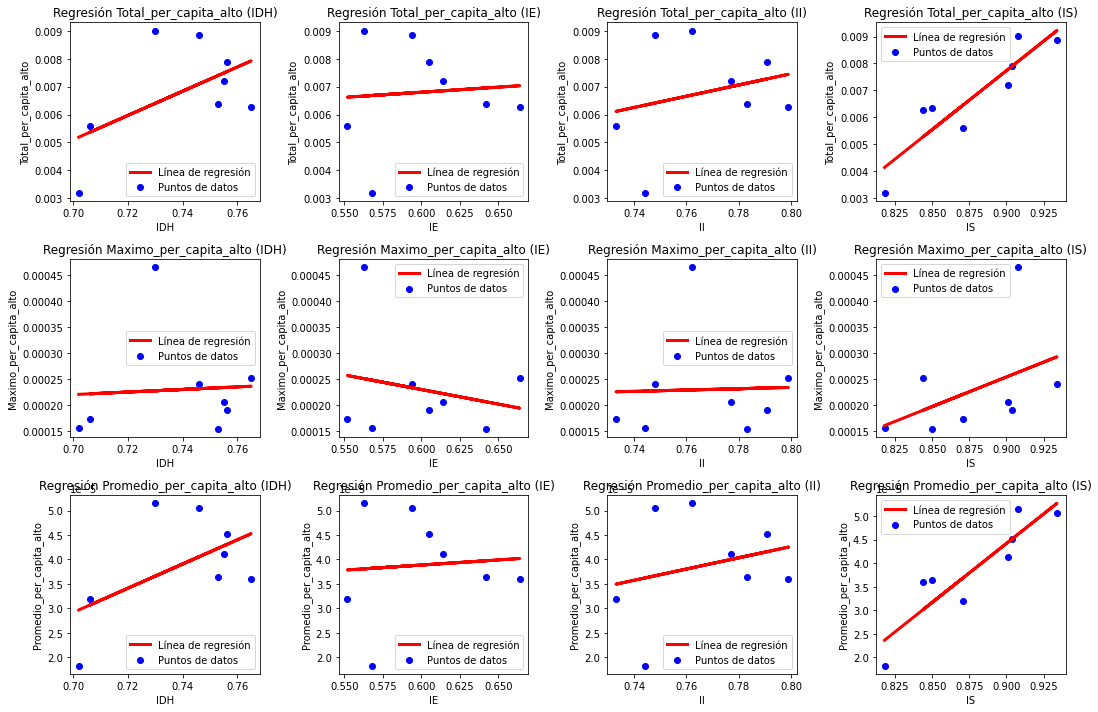

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# Función para graficar la línea de regresión
def graficar_linea_regresion(ax, x, y, modelo, etiqueta_x, etiqueta_y, titulo):
    ax.scatter(x, y, color='blue', label='Puntos de datos')
    ax.plot(x, modelo.predict(x), color='red', linewidth=3, label='Línea de regresión')
    ax.set_xlabel(etiqueta_x)
    ax.set_ylabel(etiqueta_y)
    ax.set_title(titulo)
    ax.legend()

# Crear subgráficas en un formato de 3x4
fig, axs = plt.subplots(3, 4, figsize=(15, 10))

# Graficar para Total_per_capita_alto - IDH
graficar_linea_regresion(axs[0, 0], IDH_alto, Total_per_capita_alto, modelo_Total_per_capita_alto, 'IDH', 'Total_per_capita_alto', 'Regresión Total_per_capita_alto (IDH)')

# Graficar para Total_per_capita_alto - IE
graficar_linea_regresion(axs[0, 1], IE_alto, Total_per_capita_alto, modelo_Total_per_capita_IE_alto, 'IE', 'Total_per_capita_alto', 'Regresión Total_per_capita_alto (IE)')

# Graficar para Total_per_capita_alto - II
graficar_linea_regresion(axs[0, 2], II_alto, Total_per_capita_alto, modelo_Total_per_capita_II_alto, 'II', 'Total_per_capita_alto', 'Regresión Total_per_capita_alto (II)')

# Graficar para Total_per_capita_alto - IS
graficar_linea_regresion(axs[0, 3], IS_alto, Total_per_capita_alto, modelo_Total_per_capita_IS_alto, 'IS', 'Total_per_capita_alto', 'Regresión Total_per_capita_alto (IS)')

# Graficar para Maximo_per_capita_alto - IDH
graficar_linea_regresion(axs[1, 0], IDH_alto, Maximo_per_capita_alto, modelo_Maximo_per_capita_alto, 'IDH', 'Maximo_per_capita_alto', 'Regresión Maximo_per_capita_alto (IDH)')

# Graficar para Maximo_per_capita_alto - IE
graficar_linea_regresion(axs[1, 1], IE_alto, Maximo_per_capita_alto, modelo_Maximo_per_capita_IE_alto, 'IE', 'Maximo_per_capita_alto', 'Regresión Maximo_per_capita_alto (IE)')

# Graficar para Maximo_per_capita_alto - II
graficar_linea_regresion(axs[1, 2], II_alto, Maximo_per_capita_alto, modelo_Maximo_per_capita_II_alto, 'II', 'Maximo_per_capita_alto', 'Regresión Maximo_per_capita_alto (II)')

# Graficar para Maximo_per_capita_alto - IS
graficar_linea_regresion(axs[1, 3], IS_alto, Maximo_per_capita_alto, modelo_Maximo_per_capita_IS_alto, 'IS', 'Maximo_per_capita_alto', 'Regresión Maximo_per_capita_alto (IS)')

# Graficar para Promedio_per_capita_alto - IDH
graficar_linea_regresion(axs[2, 0], IDH_alto, Promedio_per_capita_alto, modelo_Promedio_per_capita_alto, 'IDH', 'Promedio_per_capita_alto', 'Regresión Promedio_per_capita_alto (IDH)')

# Graficar para Promedio_per_capita_alto - IE
graficar_linea_regresion(axs[2, 1], IE_alto, Promedio_per_capita_alto, modelo_Promedio_per_capita_IE_alto, 'IE', 'Promedio_per_capita_alto', 'Regresión Promedio_per_capita_alto (IE)')

# Graficar para Promedio_per_capita_alto - II
graficar_linea_regresion(axs[2, 2], II_alto, Promedio_per_capita_alto, modelo_Promedio_per_capita_II_alto, 'II', 'Promedio_per_capita_alto', 'Regresión Promedio_per_capita_alto (II)')

# Graficar para Promedio_per_capita_alto - IS
graficar_linea_regresion(axs[2, 3], IS_alto, Promedio_per_capita_alto, modelo_Promedio_per_capita_IS_alto, 'IS', 'Promedio_per_capita_alto', 'Regresión Promedio_per_capita_alto (IS)')

# Ajustar el diseño de las subgráficas
plt.tight_layout()

# Mostrar las gráficas
plt.show()


# DEFUNCIONES CAT_IDH ALTO

In [23]:
df_deaths_alto = df_deaths[df_deaths['CAT_IDH'] == "Alto"]
df_deaths_alto

,MUNICIPIO,IDH,IE,II,IS,POB,CAT_IDH,Total.1,Maximo.1,Promedio.1,Total_per_capita_deaths,Maximo_per_capita_deaths,Promedio_per_capita_deaths
5,Celaya,0.753,0.642,0.783,0.850,521169,Alto,219,10,1.251429,0.000420,0.000019,2.401195e-06
8,Cortazar,0.706,0.552,0.733,0.871,97928,Alto,49,4,0.280000,0.000500,0.000041,2.859244e-06
12,Guanajuato,0.765,0.664,0.799,0.844,194500,Alto,65,4,0.371429,0.000334,0.000021,1.909658e-06
14,Irapuato,0.755,0.614,0.777,0.901,592953,Alto,197,9,1.125714,0.000332,0.000015,1.898488e-06
17,León,0.756,0.605,0.791,0.904,1721215,Alto,825,29,4.714286,0.000479,0.000017,2.738929e-06
19,Moroleón,0.730,0.563,0.762,0.908,47261,Alto,15,1,0.085714,0.000317,0.000021,1.813637e-06
25,Salamanca,0.746,0.594,0.748,0.934,273417,Alto,175,11,1.000000,0.000640,0.000040,3.657417e-06
30,San José Iturbide,0.702,0.568,0.744,0.818,89558,Alto,15,3,0.085714,0.000167,0.000033,9.570813e-07


In [24]:
IE_deaths_alto = df_deaths_alto['IE'].values.reshape(-1,1)
II_deaths_alto = df_deaths_alto['II'].values.reshape(-1,1)
IS_deaths_alto = df_deaths_alto['IS'].values.reshape(-1,1)
IDH_deaths_alto = df_deaths_alto['IDH'].values.reshape(-1,1)

Total_pc_deaths_alto = df_deaths_alto['Total_per_capita_deaths'].values.reshape(-1,1)
Maximo_pc_deaths_alto = df_deaths_alto['Maximo_per_capita_deaths'].values.reshape(-1,1)
Promedio__pc_deaths_alto = df_deaths_alto['Promedio_per_capita_deaths'].values.reshape(-1,1)

#CREACION DE MODELOS

regresion_pc_Total_deaths_alto = linear_model.LinearRegression()
regresion_pc_Maximo_deaths_alto = linear_model.LinearRegression()
regresion_pc_Promedio_deaths_alto = linear_model.LinearRegression()

regresion_pc_Total_IE_deaths_alto = linear_model.LinearRegression()
regresion_pc_Maximo_IE_deaths_alto = linear_model.LinearRegression()
regresion_pc_Promedio_IE_deaths_alto = linear_model.LinearRegression()

regresion_pc_Total_II_deaths_alto = linear_model.LinearRegression()
regresion_pc_Maximo_II_deaths_alto = linear_model.LinearRegression()
regresion_pc_Promedio_II_deaths_alto = linear_model.LinearRegression()

regresion_pc_Total_IS_deaths_alto = linear_model.LinearRegression()
regresion_pc_Maximo_IS_deaths_alto = linear_model.LinearRegression()
regresion_pc_Promedio_IS_deaths_alto = linear_model.LinearRegression()

#Adaptacion de modelos a datos de entrada
modelo_pc_Total_deaths_alto = regresion_pc_Total_deaths_alto.fit(IDH_deaths_alto, Total_pc_deaths_alto)
modelo_pc_Maximo_deaths_alto = regresion_pc_Maximo_deaths_alto.fit(IDH_deaths_alto, Maximo_pc_deaths_alto)
modelo_pc_Promedio_deaths_alto = regresion_pc_Promedio_deaths_alto.fit(IDH_deaths_alto, Promedio__pc_deaths_alto)

modelo_pc_Total_IE_deaths_alto = regresion_pc_Total_IE_deaths_alto.fit(IE_deaths_alto, Total_pc_deaths_alto)
modelo_pc_Maximo_IE_deaths_alto = regresion_pc_Maximo_IE_deaths_alto.fit(IE_deaths_alto, Maximo_pc_deaths_alto)
modelo_pc_Promedio_IE_deaths_alto = regresion_pc_Promedio_IE_deaths_alto.fit(IE_deaths_alto, Promedio__pc_deaths_alto)

modelo_pc_Total_II_deaths_alto = regresion_pc_Total_II_deaths_alto.fit(II_deaths_alto, Total_pc_deaths_alto)
modelo_pc_Maximo_II_deaths_alto = regresion_pc_Maximo_II_deaths_alto.fit(II_deaths_alto, Maximo_pc_deaths_alto)
modelo_pc_Promedio_II_deaths_alto = regresion_pc_Promedio_II_deaths_alto.fit(II_deaths_alto, Promedio__pc_deaths_alto)

modelo_pc_Total_IS_deaths_alto = regresion_pc_Total_IS_deaths_alto.fit(IS_deaths_alto, Total_pc_deaths_alto)
modelo_pc_Maximo_IS_deaths_alto = regresion_pc_Maximo_IS_deaths_alto.fit(IS_deaths_alto, Maximo_pc_deaths_alto)
modelo_pc_Promedio_IS_deaths_alto = regresion_pc_Promedio_IS_deaths_alto.fit(IS_deaths_alto, Promedio__pc_deaths_alto)

# Imprimir los modelos
print("Modelo Total_per_capita_deaths - IDH: Interseccion (b) =", modelo_pc_Total_deaths_alto.intercept_, "Pendiente =", modelo_pc_Total_deaths_alto.coef_)
print("R2 =", r2_score(Total_pc_deaths_alto, modelo_pc_Total_deaths_alto.predict(IDH_deaths_alto)))

print("Modelo Total_per_capita_deaths - IE: Interseccion (b) =", modelo_pc_Total_IE_deaths_alto.intercept_, "Pendiente =", modelo_pc_Total_IE_deaths_alto.coef_)
print("R2 =", r2_score(Total_pc_deaths_alto, modelo_pc_Total_IE_deaths_alto.predict(IE_deaths_alto)))

print("Modelo Total_per_capita_deaths - II: Interseccion (b) =", modelo_pc_Total_II_deaths_alto.intercept_, "Pendiente =", modelo_pc_Total_II_deaths_alto.coef_)
print("R2 =", r2_score(Total_pc_deaths_alto, modelo_pc_Total_II_deaths_alto.predict(II_deaths_alto)))

print("Modelo Total_per_capita_deaths - IS: Interseccion (b) =", modelo_pc_Total_IS_deaths_alto.intercept_, "Pendiente =", modelo_pc_Total_IS_deaths_alto.coef_)
print("R2 =", r2_score(Total_pc_deaths_alto, modelo_pc_Total_IS_deaths_alto.predict(IS_deaths_alto)))

print("Modelo Maximo_per_capita_deaths - IDH: Interseccion (b) =", modelo_pc_Maximo_deaths_alto.intercept_, "Pendiente =", modelo_pc_Maximo_deaths_alto.coef_)
print("R2 =", r2_score(Maximo_pc_deaths_alto, modelo_pc_Maximo_deaths_alto.predict(IDH_deaths_alto)))

print("Modelo Maximo_per_capita_deaths - IE: Interseccion (b) =", modelo_pc_Maximo_IE_deaths_alto.intercept_, "Pendiente =", modelo_pc_Maximo_IE_deaths_alto.coef_)
print("R2 =", r2_score(Maximo_pc_deaths_alto, modelo_pc_Maximo_IE_deaths_alto.predict(IE_deaths_alto)))

print("Modelo Maximo_per_capita_deaths - II: Interseccion (b) =", modelo_pc_Maximo_II_deaths_alto.intercept_, "Pendiente =", modelo_pc_Maximo_II_deaths_alto.coef_)
print("R2 =", r2_score(Maximo_pc_deaths_alto, modelo_pc_Maximo_II_deaths_alto.predict(II_deaths_alto)))

print("Modelo Maximo_per_capita_deaths - IS: Interseccion (b) =", modelo_pc_Maximo_IS_deaths_alto.intercept_, "Pendiente =", modelo_pc_Maximo_IS_deaths_alto.coef_)
print("R2 =", r2_score(Maximo_pc_deaths_alto, modelo_pc_Maximo_IS_deaths_alto.predict(IS_deaths_alto)))

print("Modelo Promedio_per_capita_deaths - IDH: Interseccion (b) =", modelo_pc_Promedio_deaths_alto.intercept_, "Pendiente =", modelo_pc_Promedio_deaths_alto.coef_)
print("R2 =", r2_score(Promedio__pc_deaths_alto, modelo_pc_Promedio_deaths_alto.predict(IDH_deaths_alto)))

print("Modelo Promedio_per_capita_deaths - IE: Interseccion (b) =", modelo_pc_Promedio_IE_deaths_alto.intercept_, "Pendiente =", modelo_pc_Promedio_IE_deaths_alto.coef_)
print("R2 =", r2_score(Promedio__pc_deaths_alto, modelo_pc_Promedio_IE_deaths_alto.predict(IE_deaths_alto)))

print("Modelo Promedio_per_capita_deaths - II: Interseccion (b) =", modelo_pc_Promedio_II_deaths_alto.intercept_, "Pendiente =", modelo_pc_Promedio_II_deaths_alto.coef_)
print("R2 =", r2_score(Promedio__pc_deaths_alto, modelo_pc_Promedio_II_deaths_alto.predict(II_deaths_alto)))

print("Modelo Promedio_per_capita_deaths - IS: Interseccion (b) =", modelo_pc_Promedio_IS_deaths_alto.intercept_, "Pendiente =", modelo_pc_Promedio_IS_deaths_alto.coef_)
print("R2 =", r2_score(Promedio__pc_deaths_alto, modelo_pc_Promedio_IS_deaths_alto.predict(IS_deaths_alto)))


Modelo Total_per_capita_deaths - IDH: Interseccion (b) = [-0.00081025] Pendiente = [[0.00163593]]
R2 = 0.07433014711035502
Modelo Total_per_capita_deaths - IE: Interseccion (b) = [0.0003808] Pendiente = [[3.0158903e-05]]
R2 = 6.82097572674012e-05
Modelo Total_per_capita_deaths - II: Interseccion (b) = [0.00092625] Pendiente = [[-0.00068743]]
R2 = 0.01319710940047858
Modelo Total_per_capita_deaths - IS: Interseccion (b) = [-0.00174362] Pendiente = [[0.00243815]]
R2 = 0.4462890692685971
Modelo Maximo_per_capita_deaths - IDH: Interseccion (b) = [0.00024547] Pendiente = [[-0.00029701]]
R2 = 0.4533009364366647
Modelo Maximo_per_capita_deaths - IE: Interseccion (b) = [0.00011974] Pendiente = [[-0.00015628]]
R2 = 0.3388496879696209
Modelo Maximo_per_capita_deaths - II: Interseccion (b) = [0.00031819] Pendiente = [[-0.00038097]]
R2 = 0.7498945520624782
Modelo Maximo_per_capita_deaths - IS: Interseccion (b) = [2.6995367e-05] Pendiente = [[-1.20171454e-06]]
R2 = 2.0058772089437404e-05
Modelo Pro

### En el análisis de defunciones, se observa un R² inferior a 0.5, excepto en el modelo para la característica "Máximo" e índice de Ingreso (II), que arroja un R² de 0.74. Esto sugiere que el máximo de defunciones diarias muestra una disminución en relación con un mayor índice de ingresos en dicho único modelo.

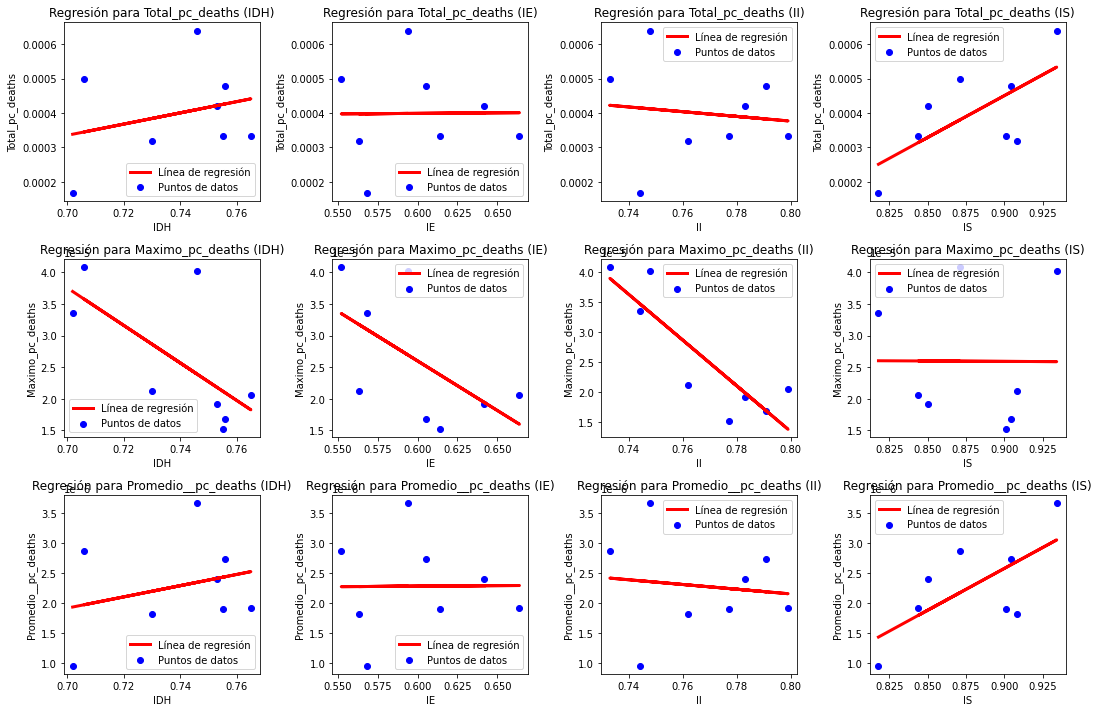

In [27]:
def graficar_linea_regresion(ax, x, y, modelo, etiqueta_x, etiqueta_y, titulo):
    ax.scatter(x, y, color='blue', label='Puntos de datos')
    ax.plot(x, modelo.predict(x), color='red', linewidth=3, label='Línea de regresión')
    ax.set_xlabel(etiqueta_x)
    ax.set_ylabel(etiqueta_y)
    ax.set_title(titulo)
    ax.legend()

# Crear subgráficas en un formato de 3x4
fig, axs = plt.subplots(3, 4, figsize=(15, 10))

# Graficar para Total_pc_deaths - IDH
graficar_linea_regresion(axs[0, 0], IDH_deaths_alto, Total_pc_deaths_alto, modelo_pc_Total_deaths_alto, 'IDH', 'Total_pc_deaths', 'Regresión para Total_pc_deaths (IDH)')

# Graficar para Total_pc_deaths - IE
graficar_linea_regresion(axs[0, 1], IE_deaths_alto, Total_pc_deaths_alto, modelo_pc_Total_IE_deaths_alto, 'IE', 'Total_pc_deaths', 'Regresión para Total_pc_deaths (IE)')

# Graficar para Total_pc_deaths - II
graficar_linea_regresion(axs[0, 2], II_deaths_alto, Total_pc_deaths_alto, modelo_pc_Total_II_deaths_alto, 'II', 'Total_pc_deaths', 'Regresión para Total_pc_deaths (II)')

# Graficar para Total_pc_deaths - IS
graficar_linea_regresion(axs[0, 3], IS_deaths_alto, Total_pc_deaths_alto, modelo_pc_Total_IS_deaths_alto, 'IS', 'Total_pc_deaths', 'Regresión para Total_pc_deaths (IS)')

# Graficar para Maximo_pc_deaths - IDH
graficar_linea_regresion(axs[1, 0], IDH_deaths_alto, Maximo_pc_deaths_alto, modelo_pc_Maximo_deaths_alto, 'IDH', 'Maximo_pc_deaths', 'Regresión para Maximo_pc_deaths (IDH)')

# Graficar para Maximo_pc_deaths - IE
graficar_linea_regresion(axs[1, 1], IE_deaths_alto, Maximo_pc_deaths_alto, modelo_pc_Maximo_IE_deaths_alto, 'IE', 'Maximo_pc_deaths', 'Regresión para Maximo_pc_deaths (IE)')

# Graficar para Maximo_pc_deaths - II
graficar_linea_regresion(axs[1, 2], II_deaths_alto, Maximo_pc_deaths_alto, modelo_pc_Maximo_II_deaths_alto, 'II', 'Maximo_pc_deaths', 'Regresión para Maximo_pc_deaths (II)')

# Graficar para Maximo_pc_deaths - IS
graficar_linea_regresion(axs[1, 3], IS_deaths_alto, Maximo_pc_deaths_alto, modelo_pc_Maximo_IS_deaths_alto, 'IS', 'Maximo_pc_deaths', 'Regresión para Maximo_pc_deaths (IS)')

# Graficar para Promedio__pc_deaths - IDH
graficar_linea_regresion(axs[2, 0], IDH_deaths_alto, Promedio__pc_deaths_alto, modelo_pc_Promedio_deaths_alto, 'IDH', 'Promedio__pc_deaths', 'Regresión para Promedio__pc_deaths (IDH)')

# Graficar para Promedio__pc_deaths - IE
graficar_linea_regresion(axs[2, 1], IE_deaths_alto, Promedio__pc_deaths_alto, modelo_pc_Promedio_IE_deaths_alto, 'IE', 'Promedio__pc_deaths', 'Regresión para Promedio__pc_deaths (IE)')

# Graficar para Promedio__pc_deaths - II
graficar_linea_regresion(axs[2, 2], II_deaths_alto, Promedio__pc_deaths_alto, modelo_pc_Promedio_II_deaths_alto, 'II', 'Promedio__pc_deaths', 'Regresión para Promedio__pc_deaths (II)')

# Graficar para Promedio__pc_deaths - IS
graficar_linea_regresion(axs[2, 3], IS_deaths_alto, Promedio__pc_deaths_alto, modelo_pc_Promedio_IS_deaths_alto, 'IS', 'Promedio__pc_deaths', 'Regresión para Promedio__pc_deaths (IS)')

# Ajustar el diseño de las subgráficas
plt.tight_layout()

# Mostrar las gráficas
plt.show()


# RECUPERADOS CAT_IDH ALTO

In [28]:
df_recovered_alto = df_recovered[df_recovered['CAT_IDH'] == "Alto"]


In [29]:
IE_recovered_alto = df_recovered_alto['IE'].values.reshape(-1, 1)
II_recovered_alto = df_recovered_alto['II'].values.reshape(-1, 1)
IS_recovered_alto = df_recovered_alto['IS'].values.reshape(-1, 1)
IDH_recovered_alto = df_recovered_alto['IDH'].values.reshape(-1, 1)

Total_pc_recovered_alto = df_recovered_alto['Total_per_capita_recovered'].values.reshape(-1, 1)
Maximo_pc_recovered_alto = df_recovered_alto['Maximo_per_capita_recovered'].values.reshape(-1, 1)
Promedio_pc_recovered_alto = df_recovered_alto['Promedio_per_capita_recovered'].values.reshape(-1, 1)

# CREACION DE MODELOS

regresion_pc_Total_recovered_alto = linear_model.LinearRegression()
regresion_pc_Maximo_recovered_alto = linear_model.LinearRegression()
regresion_pc_Promedio_recovered_alto = linear_model.LinearRegression()

regresion_pc_Total_IE_recovered_alto = linear_model.LinearRegression()
regresion_pc_Maximo_IE_recovered_alto = linear_model.LinearRegression()
regresion_pc_Promedio_IE_recovered_alto = linear_model.LinearRegression()

regresion_pc_Total_II_recovered_alto = linear_model.LinearRegression()
regresion_pc_Maximo_II_recovered_alto = linear_model.LinearRegression()
regresion_pc_Promedio_II_recovered_alto = linear_model.LinearRegression()

regresion_pc_Total_IS_recovered_alto = linear_model.LinearRegression()
regresion_pc_Maximo_IS_recovered_alto = linear_model.LinearRegression()
regresion_pc_Promedio_IS_recovered_alto = linear_model.LinearRegression()

# Adaptacion de modelos a datos de entrada
modelo_pc_Total_recovered_alto = regresion_pc_Total_recovered_alto.fit(IDH_recovered_alto, Total_pc_recovered_alto)
modelo_pc_Maximo_recovered_alto = regresion_pc_Maximo_recovered_alto.fit(IDH_recovered_alto, Maximo_pc_recovered_alto)
modelo_pc_Promedio_recovered_alto = regresion_pc_Promedio_recovered_alto.fit(IDH_recovered_alto, Promedio_pc_recovered_alto)

modelo_pc_Total_IE_recovered_alto = regresion_pc_Total_IE_recovered_alto.fit(IE_recovered_alto, Total_pc_recovered_alto)
modelo_pc_Maximo_IE_recovered_alto = regresion_pc_Maximo_IE_recovered_alto.fit(IE_recovered_alto, Maximo_pc_recovered_alto)
modelo_pc_Promedio_IE_recovered_alto = regresion_pc_Promedio_IE_recovered_alto.fit(IE_recovered_alto, Promedio_pc_recovered_alto)

modelo_pc_Total_II_recovered_alto = regresion_pc_Total_II_recovered_alto.fit(II_recovered_alto, Total_pc_recovered_alto)
modelo_pc_Maximo_II_recovered_alto = regresion_pc_Maximo_II_recovered_alto.fit(II_recovered_alto, Maximo_pc_recovered_alto)
modelo_pc_Promedio_II_recovered_alto = regresion_pc_Promedio_II_recovered_alto.fit(II_recovered_alto, Promedio_pc_recovered_alto)

modelo_pc_Total_IS_recovered_alto = regresion_pc_Total_IS_recovered_alto.fit(IS_recovered_alto, Total_pc_recovered_alto)
modelo_pc_Maximo_IS_recovered_alto = regresion_pc_Maximo_IS_recovered_alto.fit(IS_recovered_alto, Maximo_pc_recovered_alto)
modelo_pc_Promedio_IS_recovered_alto = regresion_pc_Promedio_IS_recovered_alto.fit(IS_recovered_alto, Promedio_pc_recovered_alto)


print("Modelo Total_per_capita_recovered - IDH: Interseccion (b) =", modelo_pc_Total_recovered_alto.intercept_, "Pendiente =", modelo_pc_Total_recovered_alto.coef_)
print("R2 =", r2_score(Total_pc_recovered_alto, modelo_pc_Total_recovered_alto.predict(IDH_recovered_alto)))

print("Modelo Total_per_capita_recovered - IE: Interseccion (b) =", modelo_pc_Total_IE_recovered_alto.intercept_, "Pendiente =", modelo_pc_Total_IE_recovered_alto.coef_)
print("R2 =", r2_score(Total_pc_recovered_alto, modelo_pc_Total_IE_recovered_alto.predict(IE_recovered_alto)))

print("Modelo Total_per_capita_recovered - II: Interseccion (b) =", modelo_pc_Total_II_recovered_alto.intercept_, "Pendiente =", modelo_pc_Total_II_recovered_alto.coef_)
print("R2 =", r2_score(Total_pc_recovered_alto, modelo_pc_Total_II_recovered_alto.predict(II_recovered_alto)))

print("Modelo Total_per_capita_recovered - IS: Interseccion (b) =", modelo_pc_Total_IS_recovered_alto.intercept_, "Pendiente =", modelo_pc_Total_IS_recovered_alto.coef_)
print("R2 =", r2_score(Total_pc_recovered_alto, modelo_pc_Total_IS_recovered_alto.predict(IS_recovered_alto)))

print("Modelo Maximo_per_capita_recovered - IDH: Interseccion (b) =", modelo_pc_Maximo_recovered_alto.intercept_, "Pendiente =", modelo_pc_Maximo_recovered_alto.coef_)
print("R2 =", r2_score(Maximo_pc_recovered_alto, modelo_pc_Maximo_recovered_alto.predict(IDH_recovered_alto)))

print("Modelo Maximo_per_capita_recovered - IE: Interseccion (b) =", modelo_pc_Maximo_IE_recovered_alto.intercept_, "Pendiente =", modelo_pc_Maximo_IE_recovered_alto.coef_)
print("R2 =", r2_score(Maximo_pc_recovered_alto, modelo_pc_Maximo_IE_recovered_alto.predict(IE_recovered_alto)))

print("Modelo Maximo_per_capita_recovered - II: Interseccion (b) =", modelo_pc_Maximo_II_recovered_alto.intercept_, "Pendiente =", modelo_pc_Maximo_II_recovered_alto.coef_)
print("R2 =", r2_score(Maximo_pc_recovered_alto, modelo_pc_Maximo_II_recovered_alto.predict(II_recovered_alto)))

print("Modelo Maximo_per_capita_recovered - IS: Interseccion (b) =", modelo_pc_Maximo_IS_recovered_alto.intercept_, "Pendiente =", modelo_pc_Maximo_IS_recovered_alto.coef_)
print("R2 =", r2_score(Maximo_pc_recovered_alto, modelo_pc_Maximo_IS_recovered_alto.predict(IS_recovered_alto)))

print("Modelo Promedio_per_capita_recovered - IDH: Interseccion (b) =", modelo_pc_Promedio_recovered_alto.intercept_, "Pendiente =", modelo_pc_Promedio_recovered_alto.coef_)
print("R2 =", r2_score(Promedio_pc_recovered_alto, modelo_pc_Promedio_recovered_alto.predict(IDH_recovered_alto)))

print("Modelo Promedio_per_capita_recovered - IE: Interseccion (b) =", modelo_pc_Promedio_IE_recovered_alto.intercept_, "Pendiente =", modelo_pc_Promedio_IE_recovered_alto.coef_)
print("R2 =", r2_score(Promedio_pc_recovered_alto, modelo_pc_Promedio_IE_recovered_alto.predict(IE_recovered_alto)))

print("Modelo Promedio_per_capita_recovered - II: Interseccion (b) =", modelo_pc_Promedio_II_recovered_alto.intercept_, "Pendiente =", modelo_pc_Promedio_II_recovered_alto.coef_)
print("R2 =", r2_score(Promedio_pc_recovered_alto, modelo_pc_Promedio_II_recovered_alto.predict(II_recovered_alto)))

print("Modelo Promedio_per_capita_recovered - IS: Interseccion (b) =", modelo_pc_Promedio_IS_recovered_alto.intercept_, "Pendiente =", modelo_pc_Promedio_IS_recovered_alto.coef_)
print("R2 =", r2_score(Promedio_pc_recovered_alto, modelo_pc_Promedio_IS_recovered_alto.predict(IS_recovered_alto)))



Modelo Total_per_capita_recovered - IDH: Interseccion (b) = [-10.97361509] Pendiente = [[15.24594299]]
R2 = 0.19112286173446502
Modelo Total_per_capita_recovered - IE: Interseccion (b) = [-8.05428176] Pendiente = [[13.90974474]]
R2 = 0.42955590821274225
Modelo Total_per_capita_recovered - II: Interseccion (b) = [-14.03265398] Pendiente = [[18.6771341]]
R2 = 0.28840561681134214
Modelo Total_per_capita_recovered - IS: Interseccion (b) = [6.94852718] Pendiente = [[-7.57153304]]
R2 = 0.12741797522095843
Modelo Maximo_per_capita_recovered - IDH: Interseccion (b) = [-0.2118101] Pendiente = [[0.2942963]]
R2 = 0.19140477098203956
Modelo Maximo_per_capita_recovered - IE: Interseccion (b) = [-0.15530205] Pendiente = [[0.26824441]]
R2 = 0.42936024068364465
Modelo Maximo_per_capita_recovered - II: Interseccion (b) = [-0.27064754] Pendiente = [[0.36025315]]
R2 = 0.28838848288766383
Modelo Maximo_per_capita_recovered - IS: Interseccion (b) = [0.13370996] Pendiente = [[-0.14565953]]
R2 = 0.1267418178

### Debido a la falta de datos no se puede concluir un modelo.

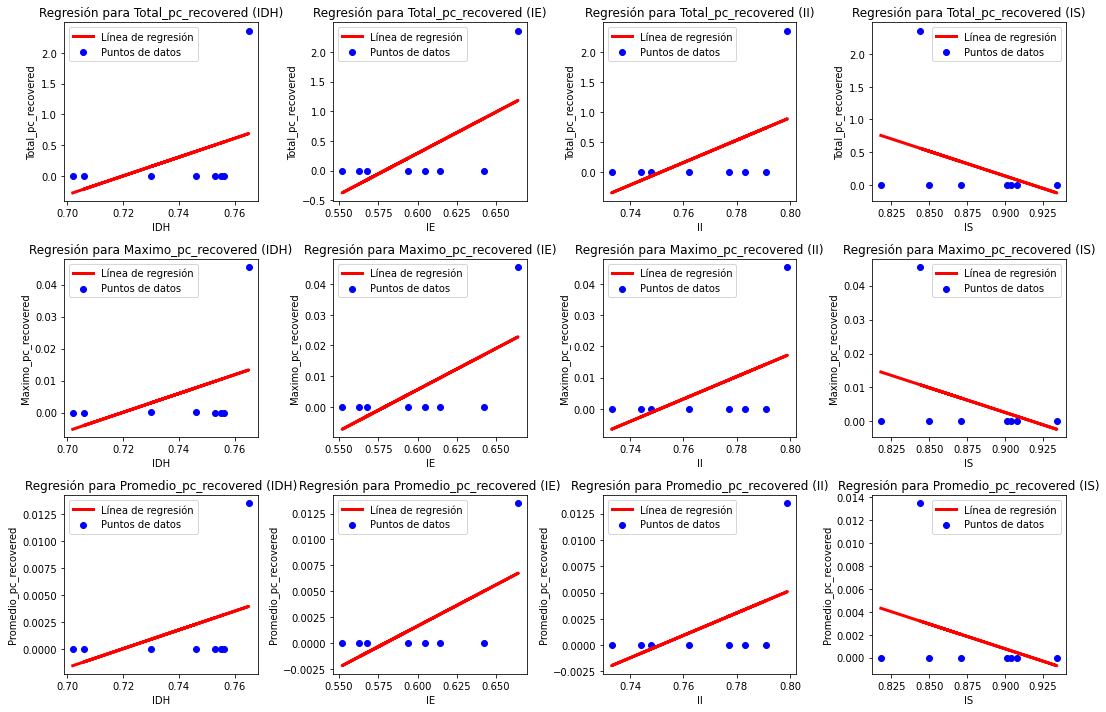

In [30]:
# Función para graficar la línea de regresión
def graficar_linea_regresion(ax, x, y, modelo, etiqueta_x, etiqueta_y, titulo):
    ax.scatter(x, y, color='blue', label='Puntos de datos')
    ax.plot(x, modelo.predict(x), color='red', linewidth=3, label='Línea de regresión')
    ax.set_xlabel(etiqueta_x)
    ax.set_ylabel(etiqueta_y)
    ax.set_title(titulo)
    ax.legend()

# Crear subgráficas en un formato de 3x4
fig, axs = plt.subplots(3, 4, figsize=(15, 10))

# Graficar para Total_pc_recovered - IDH
graficar_linea_regresion(axs[0, 0], IDH_recovered_alto, Total_pc_recovered_alto, modelo_pc_Total_recovered_alto, 'IDH', 'Total_pc_recovered', 'Regresión para Total_pc_recovered (IDH)')

# Graficar para Total_pc_recovered - IE
graficar_linea_regresion(axs[0, 1], IE_recovered_alto, Total_pc_recovered_alto, modelo_pc_Total_IE_recovered_alto, 'IE', 'Total_pc_recovered', 'Regresión para Total_pc_recovered (IE)')

# Graficar para Total_pc_recovered - II
graficar_linea_regresion(axs[0, 2], II_recovered_alto, Total_pc_recovered_alto, modelo_pc_Total_II_recovered_alto, 'II', 'Total_pc_recovered', 'Regresión para Total_pc_recovered (II)')

# Graficar para Total_pc_recovered - IS
graficar_linea_regresion(axs[0, 3], IS_recovered_alto, Total_pc_recovered_alto, modelo_pc_Total_IS_recovered_alto, 'IS', 'Total_pc_recovered', 'Regresión para Total_pc_recovered (IS)')

# Graficar para Maximo_pc_recovered - IDH
graficar_linea_regresion(axs[1, 0], IDH_recovered_alto, Maximo_pc_recovered_alto, modelo_pc_Maximo_recovered_alto, 'IDH', 'Maximo_pc_recovered', 'Regresión para Maximo_pc_recovered (IDH)')

# Graficar para Maximo_pc_recovered - IE
graficar_linea_regresion(axs[1, 1], IE_recovered_alto, Maximo_pc_recovered_alto, modelo_pc_Maximo_IE_recovered_alto, 'IE', 'Maximo_pc_recovered', 'Regresión para Maximo_pc_recovered (IE)')

# Graficar para Maximo_pc_recovered - II
graficar_linea_regresion(axs[1, 2], II_recovered_alto, Maximo_pc_recovered_alto, modelo_pc_Maximo_II_recovered_alto, 'II', 'Maximo_pc_recovered', 'Regresión para Maximo_pc_recovered (II)')

# Graficar para Maximo_pc_recovered - IS
graficar_linea_regresion(axs[1, 3], IS_recovered_alto, Maximo_pc_recovered_alto, modelo_pc_Maximo_IS_recovered_alto, 'IS', 'Maximo_pc_recovered', 'Regresión para Maximo_pc_recovered (IS)')

# Graficar para Promedio__pc_recovered - IDH
graficar_linea_regresion(axs[2, 0], IDH_recovered_alto, Promedio_pc_recovered_alto, modelo_pc_Promedio_recovered_alto, 'IDH', 'Promedio_pc_recovered', 'Regresión para Promedio_pc_recovered (IDH)')

# Graficar para Promedio__pc_recovered - IE
graficar_linea_regresion(axs[2, 1], IE_recovered_alto, Promedio_pc_recovered_alto, modelo_pc_Promedio_IE_recovered_alto, 'IE', 'Promedio_pc_recovered', 'Regresión para Promedio_pc_recovered (IE)')

# Graficar para Promedio__pc_recovered - II
graficar_linea_regresion(axs[2, 2], II_recovered_alto, Promedio_pc_recovered_alto, modelo_pc_Promedio_II_recovered_alto, 'II', 'Promedio_pc_recovered', 'Regresión para Promedio_pc_recovered (II)')

# Graficar para Promedio__pc_recovered - IS
graficar_linea_regresion(axs[2, 3], IS_recovered_alto, Promedio_pc_recovered_alto, modelo_pc_Promedio_IS_recovered_alto, 'IS', 'Promedio_pc_recovered', 'Regresión para Promedio_pc_recovered (IS)')

# Ajustar el diseño de las subgráficas
plt.tight_layout()

# Mostrar las gráficas
plt.show()


# CONFIRMADOS CAT_IDH MEDIO

In [31]:
df_confirmed_Medio = df_confirmed[df_confirmed['CAT_IDH'] == "Medio"]
df_confirmed_Medio.columns

Index(['MUNICIPIO', 'IDH', 'IE', 'II', 'IS', 'POB', 'CAT_IDH', 'Total',
       'Maximo', 'Promedio', 'Total_per_capita', 'Maximo_per_capita',
       'Promedio_per_capita'],
      dtype='object')

In [32]:
IE_confirmed_Medio = df_confirmed_Medio['IE'].values.reshape(-1, 1)
II_confirmed_Medio = df_confirmed_Medio['II'].values.reshape(-1, 1)
IS_confirmed_Medio = df_confirmed_Medio['IS'].values.reshape(-1, 1)
IDH_confirmed_Medio = df_confirmed_Medio['IDH'].values.reshape(-1, 1)

Total_pc_confirmed_Medio = df_confirmed_Medio['Total_per_capita'].values.reshape(-1, 1)
Maximo_pc_confirmed_Medio = df_confirmed_Medio['Maximo_per_capita'].values.reshape(-1, 1)
Promedio_pc_confirmed_Medio = df_confirmed_Medio['Promedio_per_capita'].values.reshape(-1, 1)

# CREACION DE MODELOS

regresion_pc_Total_confirmed_Medio = linear_model.LinearRegression()
regresion_pc_Maximo_confirmed_Medio = linear_model.LinearRegression()
regresion_pc_Promedio_confirmed_Medio = linear_model.LinearRegression()

regresion_pc_Total_IE_confirmed_Medio = linear_model.LinearRegression()
regresion_pc_Maximo_IE_confirmed_Medio = linear_model.LinearRegression()
regresion_pc_Promedio_IE_confirmed_Medio = linear_model.LinearRegression()

regresion_pc_Total_II_confirmed_Medio = linear_model.LinearRegression()
regresion_pc_Maximo_II_confirmed_Medio = linear_model.LinearRegression()
regresion_pc_Promedio_II_confirmed_Medio = linear_model.LinearRegression()

regresion_pc_Total_IS_confirmed_Medio = linear_model.LinearRegression()
regresion_pc_Maximo_IS_confirmed_Medio = linear_model.LinearRegression()
regresion_pc_Promedio_IS_confirmed_Medio = linear_model.LinearRegression()

# Adaptacion de modelos a datos de entrada
modelo_pc_Total_confirmed_Medio = regresion_pc_Total_confirmed_Medio.fit(IDH_confirmed_Medio, Total_pc_confirmed_Medio)
modelo_pc_Maximo_confirmed_Medio = regresion_pc_Maximo_confirmed_Medio.fit(IDH_confirmed_Medio, Maximo_pc_confirmed_Medio)
modelo_pc_Promedio_confirmed_Medio = regresion_pc_Promedio_confirmed_Medio.fit(IDH_confirmed_Medio, Promedio_pc_confirmed_Medio)

modelo_pc_Total_IE_confirmed_Medio = regresion_pc_Total_IE_confirmed_Medio.fit(IE_confirmed_Medio, Total_pc_confirmed_Medio)
modelo_pc_Maximo_IE_confirmed_Medio = regresion_pc_Maximo_IE_confirmed_Medio.fit(IE_confirmed_Medio, Maximo_pc_confirmed_Medio)
modelo_pc_Promedio_IE_confirmed_Medio = regresion_pc_Promedio_IE_confirmed_Medio.fit(IE_confirmed_Medio, Promedio_pc_confirmed_Medio)

modelo_pc_Total_II_confirmed_Medio = regresion_pc_Total_II_confirmed_Medio.fit(II_confirmed_Medio, Total_pc_confirmed_Medio)
modelo_pc_Maximo_II_confirmed_Medio = regresion_pc_Maximo_II_confirmed_Medio.fit(II_confirmed_Medio, Maximo_pc_confirmed_Medio)
modelo_pc_Promedio_II_confirmed_Medio = regresion_pc_Promedio_II_confirmed_Medio.fit(II_confirmed_Medio, Promedio_pc_confirmed_Medio)

modelo_pc_Total_IS_confirmed_Medio = regresion_pc_Total_IS_confirmed_Medio.fit(IS_confirmed_Medio, Total_pc_confirmed_Medio)
modelo_pc_Maximo_IS_confirmed_Medio = regresion_pc_Maximo_IS_confirmed_Medio.fit(IS_confirmed_Medio, Maximo_pc_confirmed_Medio)
modelo_pc_Promedio_IS_confirmed_Medio = regresion_pc_Promedio_IS_confirmed_Medio.fit(IS_confirmed_Medio, Promedio_pc_confirmed_Medio)

print("Modelo Total_per_capita_confirmed - IDH: Interseccion (b) =", modelo_pc_Total_confirmed_Medio.intercept_, "Pendiente =", modelo_pc_Total_confirmed_Medio.coef_)
print("R2 =", r2_score(Total_pc_confirmed_Medio, modelo_pc_Total_confirmed_Medio.predict(IDH_confirmed_Medio)))

print("Modelo Total_per_capita_confirmed - IE: Interseccion (b) =", modelo_pc_Total_IE_confirmed_Medio.intercept_, "Pendiente =", modelo_pc_Total_IE_confirmed_Medio.coef_)
print("R2 =", r2_score(Total_pc_confirmed_Medio, modelo_pc_Total_IE_confirmed_Medio.predict(IE_confirmed_Medio)))

print("Modelo Total_per_capita_confirmed - II: Interseccion (b) =", modelo_pc_Total_II_confirmed_Medio.intercept_, "Pendiente =", modelo_pc_Total_II_confirmed_Medio.coef_)
print("R2 =", r2_score(Total_pc_confirmed_Medio, modelo_pc_Total_II_confirmed_Medio.predict(II_confirmed_Medio)))

print("Modelo Total_per_capita_confirmed - IS: Interseccion (b) =", modelo_pc_Total_IS_confirmed_Medio.intercept_, "Pendiente =", modelo_pc_Total_IS_confirmed_Medio.coef_)
print("R2 =", r2_score(Total_pc_confirmed_Medio, modelo_pc_Total_IS_confirmed_Medio.predict(IS_confirmed_Medio)))

print("Modelo Maximo_per_capita_confirmed - IDH: Interseccion (b) =", modelo_pc_Maximo_confirmed_Medio.intercept_, "Pendiente =", modelo_pc_Maximo_confirmed_Medio.coef_)
print("R2 =", r2_score(Maximo_pc_confirmed_Medio, modelo_pc_Maximo_confirmed_Medio.predict(IDH_confirmed_Medio)))

print("Modelo Maximo_per_capita_confirmed - IE: Interseccion (b) =", modelo_pc_Maximo_IE_confirmed_Medio.intercept_, "Pendiente =", modelo_pc_Maximo_IE_confirmed_Medio.coef_)
print("R2 =", r2_score(Maximo_pc_confirmed_Medio, modelo_pc_Maximo_IE_confirmed_Medio.predict(IE_confirmed_Medio)))

print("Modelo Maximo_per_capita_confirmed - II: Interseccion (b) =", modelo_pc_Maximo_II_confirmed_Medio.intercept_, "Pendiente =", modelo_pc_Maximo_II_confirmed_Medio.coef_)
print("R2 =", r2_score(Maximo_pc_confirmed_Medio, modelo_pc_Maximo_II_confirmed_Medio.predict(II_confirmed_Medio)))

print("Modelo Maximo_per_capita_confirmed - IS: Interseccion (b) =", modelo_pc_Maximo_IS_confirmed_Medio.intercept_, "Pendiente =", modelo_pc_Maximo_IS_confirmed_Medio.coef_)
print("R2 =", r2_score(Maximo_pc_confirmed_Medio, modelo_pc_Maximo_IS_confirmed_Medio.predict(IS_confirmed_Medio)))

print("Modelo Promedio_per_capita_confirmed - IDH: Interseccion (b) =", modelo_pc_Promedio_confirmed_Medio.intercept_, "Pendiente =", modelo_pc_Promedio_confirmed_Medio.coef_)
print("R2 =", r2_score(Promedio_pc_confirmed_Medio, modelo_pc_Promedio_confirmed_Medio.predict(IDH_confirmed_Medio)))

print("Modelo Promedio_per_capita_confirmed - IE: Interseccion (b) =", modelo_pc_Promedio_IE_confirmed_Medio.intercept_, "Pendiente =", modelo_pc_Promedio_IE_confirmed_Medio.coef_)
print("R2 =", r2_score(Promedio_pc_confirmed_Medio, modelo_pc_Promedio_IE_confirmed_Medio.predict(IE_confirmed_Medio)))

print("Modelo Promedio_per_capita_confirmed - II: Interseccion (b) =", modelo_pc_Promedio_II_confirmed_Medio.intercept_, "Pendiente =", modelo_pc_Promedio_II_confirmed_Medio.coef_)
print("R2 =", r2_score(Promedio_pc_confirmed_Medio, modelo_pc_Promedio_II_confirmed_Medio.predict(II_confirmed_Medio)))

print("Modelo Promedio_per_capita_confirmed - IS: Interseccion (b) =", modelo_pc_Promedio_IS_confirmed_Medio.intercept_, "Pendiente =", modelo_pc_Promedio_IS_confirmed_Medio.coef_)
print("R2 =", r2_score(Promedio_pc_confirmed_Medio, modelo_pc_Promedio_IS_confirmed_Medio.predict(IS_confirmed_Medio)))


Modelo Total_per_capita_confirmed - IDH: Interseccion (b) = [-0.00869573] Pendiente = [[0.02113575]]
R2 = 0.06145411684638802
Modelo Total_per_capita_confirmed - IE: Interseccion (b) = [0.00084636] Pendiente = [[0.008359]]
R2 = 0.01151597043439978
Modelo Total_per_capita_confirmed - II: Interseccion (b) = [-0.01865384] Pendiente = [[0.03395158]]
R2 = 0.22794947670780374
Modelo Total_per_capita_confirmed - IS: Interseccion (b) = [0.00280187] Pendiente = [[0.00274985]]
R2 = 0.0020542714863948097
Modelo Maximo_per_capita_confirmed - IDH: Interseccion (b) = [0.00076277] Pendiente = [[-0.00072237]]
R2 = 0.008695881251800763
Modelo Maximo_per_capita_confirmed - IE: Interseccion (b) = [0.00055843] Pendiente = [[-0.00053254]]
R2 = 0.00566215755310695
Modelo Maximo_per_capita_confirmed - II: Interseccion (b) = [-6.15128175e-05] Pendiente = [[0.00051338]]
R2 = 0.006313471082182831
Modelo Maximo_per_capita_confirmed - IS: Interseccion (b) = [0.00126926] Pendiente = [[-0.00123465]]
R2 = 0.05016573

### Los valores R² para los modelos de recuperados IDH medio no muestran una relaciones respecto al modelo lineal

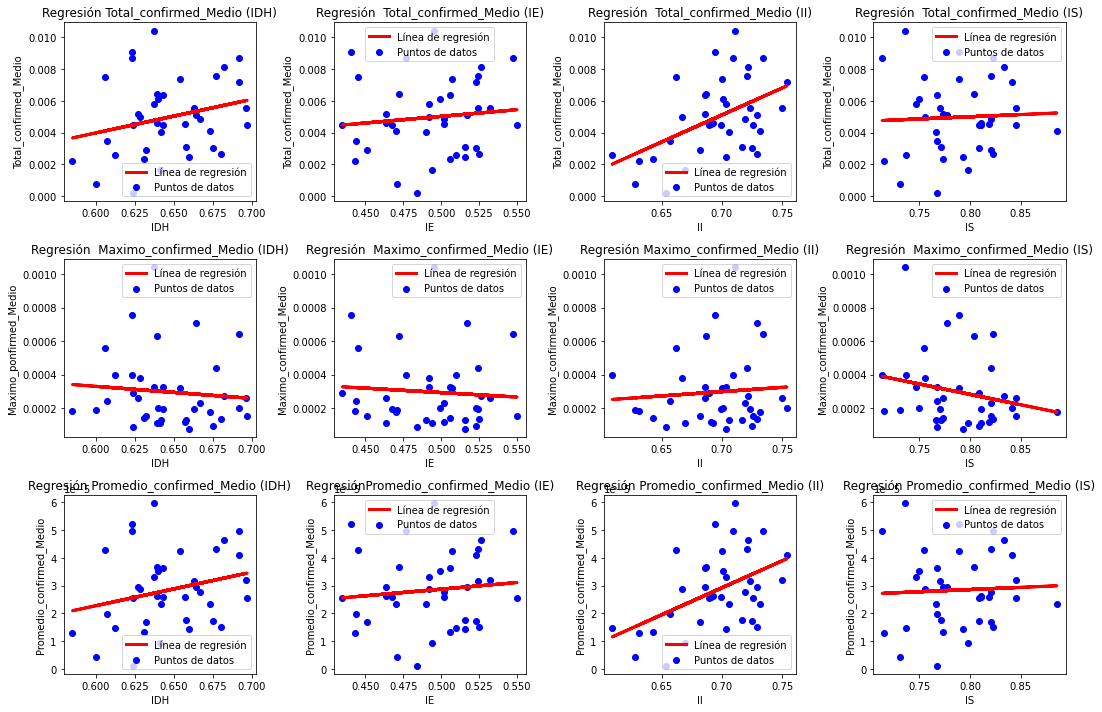

In [33]:
# Función para graficar la línea de regresión
def graficar_linea_regresion(ax, x, y, modelo, etiqueta_x, etiqueta_y, titulo):
    ax.scatter(x, y, color='blue', label='Puntos de datos')
    ax.plot(x, modelo.predict(x), color='red', linewidth=3, label='Línea de regresión')
    ax.set_xlabel(etiqueta_x)
    ax.set_ylabel(etiqueta_y)
    ax.set_title(titulo)
    ax.legend()

# Crear subgráficas en un formato de 3x4
fig, axs = plt.subplots(3, 4, figsize=(15, 10))

# Graficar para Total_pc_confirmed_Medio - IDH
graficar_linea_regresion(axs[0, 0], IDH_confirmed_Medio, Total_pc_confirmed_Medio, modelo_pc_Total_confirmed_Medio, 'IDH', 'Total_confirmed_Medio', 'Regresión Total_confirmed_Medio (IDH)')

# Graficar para Total_pc_confirmed_Medio - IE
graficar_linea_regresion(axs[0, 1], IE_confirmed_Medio, Total_pc_confirmed_Medio, modelo_pc_Total_IE_confirmed_Medio, 'IE', 'Total_confirmed_Medio', 'Regresión  Total_confirmed_Medio (IE)')

# Graficar para Total_pc_confirmed_Medio - II
graficar_linea_regresion(axs[0, 2], II_confirmed_Medio, Total_pc_confirmed_Medio, modelo_pc_Total_II_confirmed_Medio, 'II', 'Total_confirmed_Medio', 'Regresión  Total_confirmed_Medio (II)')

# Graficar para Total_pc_confirmed_Medio - IS
graficar_linea_regresion(axs[0, 3], IS_confirmed_Medio, Total_pc_confirmed_Medio, modelo_pc_Total_IS_confirmed_Medio, 'IS', 'Total_confirmed_Medio', 'Regresión  Total_confirmed_Medio (IS)')

# Graficar para Maximo_pc_confirmed_Medio - IDH
graficar_linea_regresion(axs[1, 0], IDH_confirmed_Medio, Maximo_pc_confirmed_Medio, modelo_pc_Maximo_confirmed_Medio, 'IDH', 'Maximo_ponfirmed_Medio', 'Regresión  Maximo_confirmed_Medio (IDH)')

# Graficar para Maximo_pc_confirmed_Medio - IE
graficar_linea_regresion(axs[1, 1], IE_confirmed_Medio, Maximo_pc_confirmed_Medio, modelo_pc_Maximo_IE_confirmed_Medio, 'IE', 'Maximo_confirmed_Medio', 'Regresión  Maximo_confirmed_Medio (IE)')

# Graficar para Maximo_pc_confirmed_Medio - II
graficar_linea_regresion(axs[1, 2], II_confirmed_Medio, Maximo_pc_confirmed_Medio, modelo_pc_Maximo_II_confirmed_Medio, 'II', 'Maximo_confirmed_Medio', 'Regresión Maximo_confirmed_Medio (II)')

# Graficar para Maximo_pc_confirmed_Medio - IS
graficar_linea_regresion(axs[1, 3], IS_confirmed_Medio, Maximo_pc_confirmed_Medio, modelo_pc_Maximo_IS_confirmed_Medio, 'IS', 'Maximo_confirmed_Medio', 'Regresión  Maximo_confirmed_Medio (IS)')

# Graficar para Promedio_pc_confirmed_Medio - IDH
graficar_linea_regresion(axs[2, 0], IDH_confirmed_Medio, Promedio_pc_confirmed_Medio, modelo_pc_Promedio_confirmed_Medio, 'IDH', 'Promedio_confirmed_Medio', 'Regresión Promedio_confirmed_Medio (IDH)')

# Graficar para Promedio_pc_confirmed_Medio - IE
graficar_linea_regresion(axs[2, 1], IE_confirmed_Medio, Promedio_pc_confirmed_Medio, modelo_pc_Promedio_IE_confirmed_Medio, 'IE', 'Promedio_confirmed_Medio', 'RegresiónPromedio_confirmed_Medio (IE)')

# Graficar para Promedio_pc_confirmed_Medio - II
graficar_linea_regresion(axs[2, 2], II_confirmed_Medio, Promedio_pc_confirmed_Medio, modelo_pc_Promedio_II_confirmed_Medio, 'II', 'Promedio_confirmed_Medio', 'Regresión Promedio_confirmed_Medio (II)')

# Graficar para Promedio_pc_confirmed_Medio - IS
graficar_linea_regresion(axs[2, 3], IS_confirmed_Medio, Promedio_pc_confirmed_Medio, modelo_pc_Promedio_IS_confirmed_Medio, 'IS', 'Promedio_confirmed_Medio', 'Regresión Promedio_confirmed_Medio (IS)')

# Ajustar el diseño de las subgráficas
plt.tight_layout()

# Mostrar las gráficas
plt.show()


# DEFUNCIONES CAT_IDH MEDIO

In [34]:
df_deaths_Medio = df_deaths[df_deaths['CAT_IDH'] == "Medio"]
df_deaths_Medio.columns

Index(['MUNICIPIO', 'IDH', 'IE', 'II', 'IS', 'POB', 'CAT_IDH', 'Total.1',
       'Maximo.1', 'Promedio.1', 'Total_per_capita_deaths',
       'Maximo_per_capita_deaths', 'Promedio_per_capita_deaths'],
      dtype='object')

In [35]:
IE_deaths_Medio = df_deaths_Medio['IE'].values.reshape(-1, 1)
II_deaths_Medio = df_deaths_Medio['II'].values.reshape(-1, 1)
IS_deaths_Medio = df_deaths_Medio['IS'].values.reshape(-1, 1)
IDH_deaths_Medio = df_deaths_Medio['IDH'].values.reshape(-1, 1)

Total_pc_deaths_Medio = df_deaths_Medio['Total_per_capita_deaths'].values.reshape(-1, 1)
Maximo_pc_deaths_Medio = df_deaths_Medio['Maximo_per_capita_deaths'].values.reshape(-1, 1)
Promedio_pc_deaths_Medio = df_deaths_Medio['Promedio_per_capita_deaths'].values.reshape(-1, 1)

# CREACION DE MODELOS

regresion_pc_Total_deaths_Medio = linear_model.LinearRegression()
regresion_pc_Maximo_deaths_Medio = linear_model.LinearRegression()
regresion_pc_Promedio_deaths_Medio = linear_model.LinearRegression()

regresion_pc_Total_IE_deaths_Medio = linear_model.LinearRegression()
regresion_pc_Maximo_IE_deaths_Medio = linear_model.LinearRegression()
regresion_pc_Promedio_IE_deaths_Medio = linear_model.LinearRegression()

regresion_pc_Total_II_deaths_Medio = linear_model.LinearRegression()
regresion_pc_Maximo_II_deaths_Medio = linear_model.LinearRegression()
regresion_pc_Promedio_II_deaths_Medio = linear_model.LinearRegression()

regresion_pc_Total_IS_deaths_Medio = linear_model.LinearRegression()
regresion_pc_Maximo_IS_deaths_Medio = linear_model.LinearRegression()
regresion_pc_Promedio_IS_deaths_Medio = linear_model.LinearRegression()

# Adaptacion de modelos a datos de entrada
modelo_pc_Total_deaths_Medio = regresion_pc_Total_deaths_Medio.fit(IDH_deaths_Medio, Total_pc_deaths_Medio)
modelo_pc_Maximo_deaths_Medio = regresion_pc_Maximo_deaths_Medio.fit(IDH_deaths_Medio, Maximo_pc_deaths_Medio)
modelo_pc_Promedio_deaths_Medio = regresion_pc_Promedio_deaths_Medio.fit(IDH_deaths_Medio, Promedio_pc_deaths_Medio)

modelo_pc_Total_IE_deaths_Medio = regresion_pc_Total_IE_deaths_Medio.fit(IE_deaths_Medio, Total_pc_deaths_Medio)
modelo_pc_Maximo_IE_deaths_Medio = regresion_pc_Maximo_IE_deaths_Medio.fit(IE_deaths_Medio, Maximo_pc_deaths_Medio)
modelo_pc_Promedio_IE_deaths_Medio = regresion_pc_Promedio_IE_deaths_Medio.fit(IE_deaths_Medio, Promedio_pc_deaths_Medio)

modelo_pc_Total_II_deaths_Medio = regresion_pc_Total_II_deaths_Medio.fit(II_deaths_Medio, Total_pc_deaths_Medio)
modelo_pc_Maximo_II_deaths_Medio = regresion_pc_Maximo_II_deaths_Medio.fit(II_deaths_Medio, Maximo_pc_deaths_Medio)
modelo_pc_Promedio_II_deaths_Medio = regresion_pc_Promedio_II_deaths_Medio.fit(II_deaths_Medio, Promedio_pc_deaths_Medio)

modelo_pc_Total_IS_deaths_Medio = regresion_pc_Total_IS_deaths_Medio.fit(IS_deaths_Medio, Total_pc_deaths_Medio)
modelo_pc_Maximo_IS_deaths_Medio = regresion_pc_Maximo_IS_deaths_Medio.fit(IS_deaths_Medio, Maximo_pc_deaths_Medio)
modelo_pc_Promedio_IS_deaths_Medio = regresion_pc_Promedio_IS_deaths_Medio.fit(IS_deaths_Medio, Promedio_pc_deaths_Medio)

print("Modelo Total_per_capita_deaths - IDH: Intersección (b) =", modelo_pc_Total_deaths_Medio.intercept_, "Pendiente =", modelo_pc_Total_deaths_Medio.coef_)
print("R2 =", r2_score(Total_pc_deaths_Medio, modelo_pc_Total_deaths_Medio.predict(IDH_deaths_Medio)))

print("Modelo Total_per_capita_deaths - IE: Intersección (b) =", modelo_pc_Total_IE_deaths_Medio.intercept_, "Pendiente =", modelo_pc_Total_IE_deaths_Medio.coef_)
print("R2 =", r2_score(Total_pc_deaths_Medio, modelo_pc_Total_IE_deaths_Medio.predict(IE_deaths_Medio)))

print("Modelo Total_per_capita_deaths - II: Intersección (b) =", modelo_pc_Total_II_deaths_Medio.intercept_, "Pendiente =", modelo_pc_Total_II_deaths_Medio.coef_)
print("R2 =", r2_score(Total_pc_deaths_Medio, modelo_pc_Total_II_deaths_Medio.predict(II_deaths_Medio)))

print("Modelo Total_per_capita_deaths - IS: Intersección (b) =", modelo_pc_Total_IS_deaths_Medio.intercept_, "Pendiente =", modelo_pc_Total_IS_deaths_Medio.coef_)
print("R2 =", r2_score(Total_pc_deaths_Medio, modelo_pc_Total_IS_deaths_Medio.predict(IS_deaths_Medio)))

print("Modelo Maximo_per_capita_deaths - IDH: Intersección (b) =", modelo_pc_Maximo_deaths_Medio.intercept_, "Pendiente =", modelo_pc_Maximo_deaths_Medio.coef_)
print("R2 =", r2_score(Maximo_pc_deaths_Medio, modelo_pc_Maximo_deaths_Medio.predict(IDH_deaths_Medio)))

print("Modelo Maximo_per_capita_deaths - IE: Intersección (b) =", modelo_pc_Maximo_IE_deaths_Medio.intercept_, "Pendiente =", modelo_pc_Maximo_IE_deaths_Medio.coef_)
print("R2 =", r2_score(Maximo_pc_deaths_Medio, modelo_pc_Maximo_IE_deaths_Medio.predict(IE_deaths_Medio)))

print("Modelo Maximo_per_capita_deaths - II: Intersección (b) =", modelo_pc_Maximo_II_deaths_Medio.intercept_, "Pendiente =", modelo_pc_Maximo_II_deaths_Medio.coef_)
print("R2 =", r2_score(Maximo_pc_deaths_Medio, modelo_pc_Maximo_II_deaths_Medio.predict(II_deaths_Medio)))

print("Modelo Maximo_per_capita_deaths - IS: Intersección (b) =", modelo_pc_Maximo_IS_deaths_Medio.intercept_, "Pendiente =", modelo_pc_Maximo_IS_deaths_Medio.coef_)
print("R2 =", r2_score(Maximo_pc_deaths_Medio, modelo_pc_Maximo_IS_deaths_Medio.predict(IS_deaths_Medio)))

print("Modelo Promedio_per_capita_deaths - IDH: Intersección (b) =", modelo_pc_Promedio_deaths_Medio.intercept_, "Pendiente =", modelo_pc_Promedio_deaths_Medio.coef_)
print("R2 =", r2_score(Promedio_pc_deaths_Medio, modelo_pc_Promedio_deaths_Medio.predict(IDH_deaths_Medio)))

print("Modelo Promedio_per_capita_deaths - IE: Intersección (b) =", modelo_pc_Promedio_IE_deaths_Medio.intercept_, "Pendiente =", modelo_pc_Promedio_IE_deaths_Medio.coef_)
print("R2 =", r2_score(Promedio_pc_deaths_Medio, modelo_pc_Promedio_IE_deaths_Medio.predict(IE_deaths_Medio)))

print("Modelo Promedio_per_capita_deaths - II: Intersección (b) =", modelo_pc_Promedio_II_deaths_Medio.intercept_, "Pendiente =", modelo_pc_Promedio_II_deaths_Medio.coef_)
print("R2 =", r2_score(Promedio_pc_deaths_Medio, modelo_pc_Promedio_II_deaths_Medio.predict(II_deaths_Medio)))

print("Modelo Promedio_per_capita_deaths - IS: Intersección (b) =", modelo_pc_Promedio_IS_deaths_Medio.intercept_, "Pendiente =", modelo_pc_Promedio_IS_deaths_Medio.coef_)
print("R2 =", r2_score(Promedio_pc_deaths_Medio, modelo_pc_Promedio_IS_deaths_Medio.predict(IS_deaths_Medio)))


Modelo Total_per_capita_deaths - IDH: Intersección (b) = [-0.00078584] Pendiente = [[0.0015415]]
R2 = 0.08079458319995358
Modelo Total_per_capita_deaths - IE: Intersección (b) = [-0.00045632] Pendiente = [[0.00135237]]
R2 = 0.0745010162617632
Modelo Total_per_capita_deaths - II: Intersección (b) = [-0.00093701] Pendiente = [[0.00164968]]
R2 = 0.13301327644819005
Modelo Total_per_capita_deaths - IS: Intersección (b) = [6.97731489e-05] Pendiente = [[0.00017892]]
R2 = 0.0021495588317739234
Modelo Maximo_per_capita_deaths - IDH: Intersección (b) = [6.57496615e-05] Pendiente = [[-4.20378008e-05]]
R2 = 0.0013711885199274576
Modelo Maximo_per_capita_deaths - IE: Intersección (b) = [-4.3277422e-06] Pendiente = [[8.69511162e-05]]
R2 = 0.007028198966533394
Modelo Maximo_per_capita_deaths - II: Intersección (b) = [3.41318416e-06] Pendiente = [[5.05244648e-05]]
R2 = 0.002847236669158426
Modelo Maximo_per_capita_deaths - IS: Intersección (b) = [0.00019733] Pendiente = [[-0.00020134]]
R2 = 0.0621184

### Los valores R² para los modelos de defuncionesCAT_IDH medio no muestran una relaciones respecto al modelo lineal

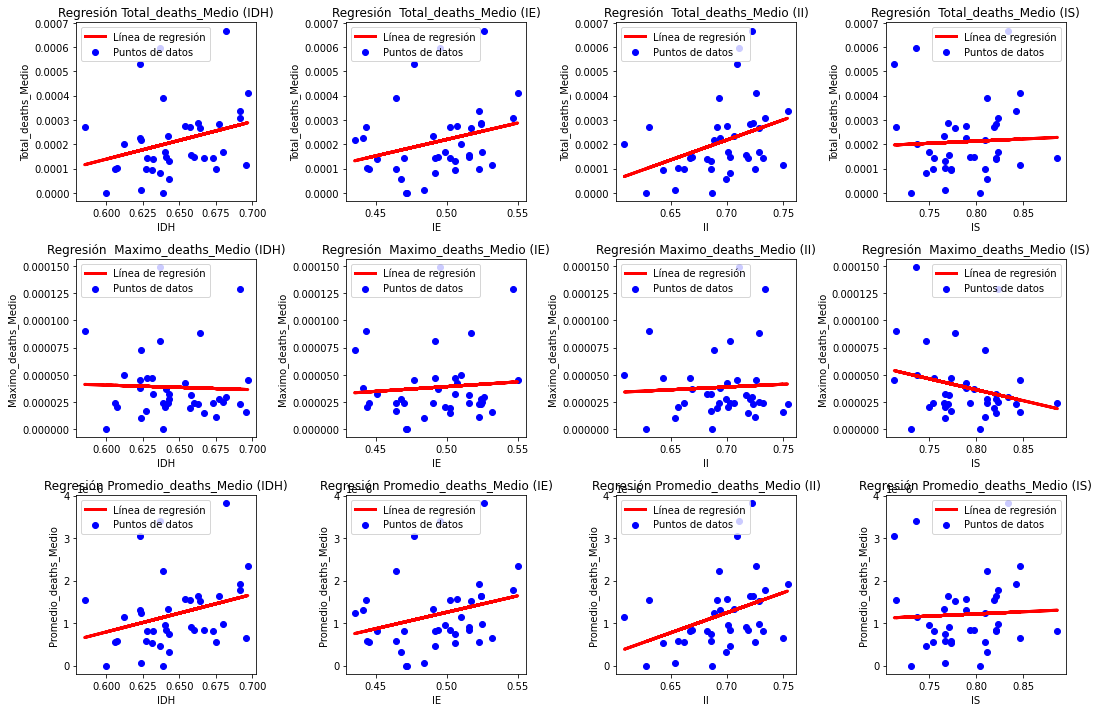

In [36]:
# Función para graficar la línea de regresión
def graficar_linea_regresion(ax, x, y, modelo, etiqueta_x, etiqueta_y, titulo):
    ax.scatter(x, y, color='blue', label='Puntos de datos')
    ax.plot(x, modelo.predict(x), color='red', linewidth=3, label='Línea de regresión')
    ax.set_xlabel(etiqueta_x)
    ax.set_ylabel(etiqueta_y)
    ax.set_title(titulo)
    ax.legend()

# Crear subgráficas en un formato de 3x4
fig, axs = plt.subplots(3, 4, figsize=(15, 10))

# Graficar para Total_pc_deaths_Medio - IDH
graficar_linea_regresion(axs[0, 0], IDH_deaths_Medio, Total_pc_deaths_Medio, modelo_pc_Total_deaths_Medio, 'IDH', 'Total_deaths_Medio', 'Regresión Total_deaths_Medio (IDH)')

# Graficar para Total_pc_deaths_Medio - IE
graficar_linea_regresion(axs[0, 1], IE_deaths_Medio, Total_pc_deaths_Medio, modelo_pc_Total_IE_deaths_Medio, 'IE', 'Total_deaths_Medio', 'Regresión  Total_deaths_Medio (IE)')

# Graficar para Total_pc_deaths_Medio - II
graficar_linea_regresion(axs[0, 2], II_deaths_Medio, Total_pc_deaths_Medio, modelo_pc_Total_II_deaths_Medio, 'II', 'Total_deaths_Medio', 'Regresión  Total_deaths_Medio (II)')

# Graficar para Total_pc_deaths_Medio - IS
graficar_linea_regresion(axs[0, 3], IS_deaths_Medio, Total_pc_deaths_Medio, modelo_pc_Total_IS_deaths_Medio, 'IS', 'Total_deaths_Medio', 'Regresión  Total_deaths_Medio (IS)')

# Graficar para Maximo_pc_deaths_Medio - IDH
graficar_linea_regresion(axs[1, 0], IDH_deaths_Medio, Maximo_pc_deaths_Medio, modelo_pc_Maximo_deaths_Medio, 'IDH', 'Maximo_deaths_Medio', 'Regresión  Maximo_deaths_Medio (IDH)')

# Graficar para Maximo_pc_deaths_Medio - IE
graficar_linea_regresion(axs[1, 1], IE_deaths_Medio, Maximo_pc_deaths_Medio, modelo_pc_Maximo_IE_deaths_Medio, 'IE', 'Maximo_deaths_Medio', 'Regresión  Maximo_deaths_Medio (IE)')

# Graficar para Maximo_pc_deaths_Medio - II
graficar_linea_regresion(axs[1, 2], II_deaths_Medio, Maximo_pc_deaths_Medio, modelo_pc_Maximo_II_deaths_Medio, 'II', 'Maximo_deaths_Medio', 'Regresión Maximo_deaths_Medio (II)')

# Graficar para Maximo_pc_deaths_Medio - IS
graficar_linea_regresion(axs[1, 3], IS_deaths_Medio, Maximo_pc_deaths_Medio, modelo_pc_Maximo_IS_deaths_Medio, 'IS', 'Maximo_deaths_Medio', 'Regresión  Maximo_deaths_Medio (IS)')

# Graficar para Promedio_pc_deaths_Medio - IDH
graficar_linea_regresion(axs[2, 0], IDH_deaths_Medio, Promedio_pc_deaths_Medio, modelo_pc_Promedio_deaths_Medio, 'IDH', 'Promedio_deaths_Medio', 'Regresión Promedio_deaths_Medio (IDH)')

# Graficar para Promedio_pc_deaths_Medio - IE
graficar_linea_regresion(axs[2, 1], IE_deaths_Medio, Promedio_pc_deaths_Medio, modelo_pc_Promedio_IE_deaths_Medio, 'IE', 'Promedio_deaths_Medio', 'Regresión Promedio_deaths_Medio (IE)')

# Graficar para Promedio_pc_deaths_Medio - II
graficar_linea_regresion(axs[2, 2], II_deaths_Medio, Promedio_pc_deaths_Medio, modelo_pc_Promedio_II_deaths_Medio, 'II', 'Promedio_deaths_Medio', 'Regresión Promedio_deaths_Medio (II)')

# Graficar para Promedio_pc_deaths_Medio - IS
graficar_linea_regresion(axs[2, 3], IS_deaths_Medio, Promedio_pc_deaths_Medio, modelo_pc_Promedio_IS_deaths_Medio, 'IS', 'Promedio_deaths_Medio', 'Regresión Promedio_deaths_Medio (IS)')

# Ajustar el diseño de las subgráficas
plt.tight_layout()

# Mostrar las gráficas
plt.show()



# RECUPERADOS CAT_IDH MEDIO

In [37]:
df_recovered_Medio = df_recovered[df_recovered['CAT_IDH'] == "Medio"]
df_recovered_Medio.columns

Index(['MUNICIPIO', 'IDH', 'IE', 'II', 'IS', 'POB', 'CAT_IDH', 'Total.2',
       'Maximo.2', 'Promedio.2', 'Total_per_capita_recovered',
       'Maximo_per_capita_recovered', 'Promedio_per_capita_recovered'],
      dtype='object')

In [38]:
IE_recovered_Medio = df_recovered_Medio['IE'].values.reshape(-1, 1)
II_recovered_Medio = df_recovered_Medio['II'].values.reshape(-1, 1)
IS_recovered_Medio = df_recovered_Medio['IS'].values.reshape(-1, 1)
IDH_recovered_Medio = df_recovered_Medio['IDH'].values.reshape(-1, 1)

Total_pc_recovered_Medio = df_recovered_Medio['Total_per_capita_recovered'].values.reshape(-1, 1)
Maximo_pc_recovered_Medio = df_recovered_Medio['Maximo_per_capita_recovered'].values.reshape(-1, 1)
Promedio_pc_recovered_Medio = df_recovered_Medio['Promedio_per_capita_recovered'].values.reshape(-1, 1)

# CREACION DE MODELOS

regresion_pc_Total_recovered_Medio = linear_model.LinearRegression()
regresion_pc_Maximo_recovered_Medio = linear_model.LinearRegression()
regresion_pc_Promedio_recovered_Medio = linear_model.LinearRegression()

regresion_pc_Total_IE_recovered_Medio = linear_model.LinearRegression()
regresion_pc_Maximo_IE_recovered_Medio = linear_model.LinearRegression()
regresion_pc_Promedio_IE_recovered_Medio = linear_model.LinearRegression()

regresion_pc_Total_II_recovered_Medio = linear_model.LinearRegression()
regresion_pc_Maximo_II_recovered_Medio = linear_model.LinearRegression()
regresion_pc_Promedio_II_recovered_Medio = linear_model.LinearRegression()

regresion_pc_Total_IS_recovered_Medio = linear_model.LinearRegression()
regresion_pc_Maximo_IS_recovered_Medio = linear_model.LinearRegression()
regresion_pc_Promedio_IS_recovered_Medio = linear_model.LinearRegression()

# Adaptación de modelos a datos de entrada
modelo_pc_Total_recovered_Medio = regresion_pc_Total_recovered_Medio.fit(IDH_recovered_Medio, Total_pc_recovered_Medio)
modelo_pc_Maximo_recovered_Medio = regresion_pc_Maximo_recovered_Medio.fit(IDH_recovered_Medio, Maximo_pc_recovered_Medio)
modelo_pc_Promedio_recovered_Medio = regresion_pc_Promedio_recovered_Medio.fit(IDH_recovered_Medio, Promedio_pc_recovered_Medio)

modelo_pc_Total_IE_recovered_Medio = regresion_pc_Total_IE_recovered_Medio.fit(IE_recovered_Medio, Total_pc_recovered_Medio)
modelo_pc_Maximo_IE_recovered_Medio = regresion_pc_Maximo_IE_recovered_Medio.fit(IE_recovered_Medio, Maximo_pc_recovered_Medio)
modelo_pc_Promedio_IE_recovered_Medio = regresion_pc_Promedio_IE_recovered_Medio.fit(IE_recovered_Medio, Promedio_pc_recovered_Medio)

modelo_pc_Total_II_recovered_Medio = regresion_pc_Total_II_recovered_Medio.fit(II_recovered_Medio, Total_pc_recovered_Medio)
modelo_pc_Maximo_II_recovered_Medio = regresion_pc_Maximo_II_recovered_Medio.fit(II_recovered_Medio, Maximo_pc_recovered_Medio)
modelo_pc_Promedio_II_recovered_Medio = regresion_pc_Promedio_II_recovered_Medio.fit(II_recovered_Medio, Promedio_pc_recovered_Medio)

modelo_pc_Total_IS_recovered_Medio = regresion_pc_Total_IS_recovered_Medio.fit(IS_recovered_Medio, Total_pc_recovered_Medio)
modelo_pc_Maximo_IS_recovered_Medio = regresion_pc_Maximo_IS_recovered_Medio.fit(IS_recovered_Medio, Maximo_pc_recovered_Medio)
modelo_pc_Promedio_IS_recovered_Medio = regresion_pc_Promedio_IS_recovered_Medio.fit(IS_recovered_Medio, Promedio_pc_recovered_Medio)

print("Modelo Total_per_capita_recovered - IDH: Intersección (b) =", modelo_pc_Total_recovered_Medio.intercept_, "Pendiente =", modelo_pc_Total_recovered_Medio.coef_)
print("R2 =", r2_score(Total_pc_recovered_Medio, modelo_pc_Total_recovered_Medio.predict(IDH_recovered_Medio)))

print("Modelo Total_per_capita_recovered - IE: Intersección (b) =", modelo_pc_Total_IE_recovered_Medio.intercept_, "Pendiente =", modelo_pc_Total_IE_recovered_Medio.coef_)
print("R2 =", r2_score(Total_pc_recovered_Medio, modelo_pc_Total_IE_recovered_Medio.predict(IE_recovered_Medio)))

print("Modelo Total_per_capita_recovered - II: Intersección (b) =", modelo_pc_Total_II_recovered_Medio.intercept_, "Pendiente =", modelo_pc_Total_II_recovered_Medio.coef_)
print("R2 =", r2_score(Total_pc_recovered_Medio, modelo_pc_Total_II_recovered_Medio.predict(II_recovered_Medio)))

print("Modelo Total_per_capita_recovered - IS: Intersección (b) =", modelo_pc_Total_IS_recovered_Medio.intercept_, "Pendiente =", modelo_pc_Total_IS_recovered_Medio.coef_)
print("R2 =", r2_score(Total_pc_recovered_Medio, modelo_pc_Total_IS_recovered_Medio.predict(IS_recovered_Medio)))

print("Modelo Maximo_per_capita_recovered - IDH: Intersección (b) =", modelo_pc_Maximo_recovered_Medio.intercept_, "Pendiente =", modelo_pc_Maximo_recovered_Medio.coef_)
print("R2 =", r2_score(Maximo_pc_recovered_Medio, modelo_pc_Maximo_recovered_Medio.predict(IDH_recovered_Medio)))

print("Modelo Maximo_per_capita_recovered - IE: Intersección (b) =", modelo_pc_Maximo_IE_recovered_Medio.intercept_, "Pendiente =", modelo_pc_Maximo_IE_recovered_Medio.coef_)
print("R2 =", r2_score(Maximo_pc_recovered_Medio, modelo_pc_Maximo_IE_recovered_Medio.predict(IE_recovered_Medio)))

print("Modelo Maximo_per_capita_recovered - II: Intersección (b) =", modelo_pc_Maximo_II_recovered_Medio.intercept_, "Pendiente =", modelo_pc_Maximo_II_recovered_Medio.coef_)
print("R2 =", r2_score(Maximo_pc_recovered_Medio, modelo_pc_Maximo_II_recovered_Medio.predict(II_recovered_Medio)))

print("Modelo Maximo_per_capita_recovered - IS: Intersección (b) =", modelo_pc_Maximo_IS_recovered_Medio.intercept_, "Pendiente =", modelo_pc_Maximo_IS_recovered_Medio.coef_)
print("R2 =", r2_score(Maximo_pc_recovered_Medio, modelo_pc_Maximo_IS_recovered_Medio.predict(IS_recovered_Medio)))

print("Modelo Promedio_per_capita_recovered - IDH: Intersección (b) =", modelo_pc_Promedio_recovered_Medio.intercept_, "Pendiente =", modelo_pc_Promedio_recovered_Medio.coef_)
print("R2 =", r2_score(Promedio_pc_recovered_Medio, modelo_pc_Promedio_recovered_Medio.predict(IDH_recovered_Medio)))

print("Modelo Promedio_per_capita_recovered - IE: Intersección (b) =", modelo_pc_Promedio_IE_recovered_Medio.intercept_, "Pendiente =", modelo_pc_Promedio_IE_recovered_Medio.coef_)
print("R2 =", r2_score(Promedio_pc_recovered_Medio, modelo_pc_Promedio_IE_recovered_Medio.predict(IE_recovered_Medio)))

print("Modelo Promedio_per_capita_recovered - II: Intersección (b) =", modelo_pc_Promedio_II_recovered_Medio.intercept_, "Pendiente =", modelo_pc_Promedio_II_recovered_Medio.coef_)
print("R2 =", r2_score(Promedio_pc_recovered_Medio, modelo_pc_Promedio_II_recovered_Medio.predict(II_recovered_Medio)))

print("Modelo Promedio_per_capita_recovered - IS: Intersección (b) =", modelo_pc_Promedio_IS_recovered_Medio.intercept_, "Pendiente =", modelo_pc_Promedio_IS_recovered_Medio.coef_)
print("R2 =", r2_score(Promedio_pc_recovered_Medio, modelo_pc_Promedio_IS_recovered_Medio.predict(IS_recovered_Medio)))


Modelo Total_per_capita_recovered - IDH: Intersección (b) = [-0.00017711] Pendiente = [[0.00029312]]
R2 = 0.06185830524019087
Modelo Total_per_capita_recovered - IE: Intersección (b) = [-0.00013491] Pendiente = [[0.00029863]]
R2 = 0.07692174388491047
Modelo Total_per_capita_recovered - II: Intersección (b) = [-0.00016249] Pendiente = [[0.00025136]]
R2 = 0.06539000473109124
Modelo Total_per_capita_recovered - IS: Intersección (b) = [-1.7316605e-05] Pendiente = [[3.77055159e-05]]
R2 = 0.0020213703090424806
Modelo Maximo_per_capita_recovered - IDH: Intersección (b) = [-2.15353267e-05] Pendiente = [[3.53857252e-05]]
R2 = 0.06508730369939553
Modelo Maximo_per_capita_recovered - IE: Intersección (b) = [-1.3630141e-05] Pendiente = [[3.03531346e-05]]
R2 = 0.057375133207329454
Modelo Maximo_per_capita_recovered - II: Intersección (b) = [-1.85761853e-05] Pendiente = [[2.86290192e-05]]
R2 = 0.061242928850723244
Modelo Maximo_per_capita_recovered - IS: Intersección (b) = [-7.41359308e-06] Pendient

### Por falta de datos no se puede concluir un modelo

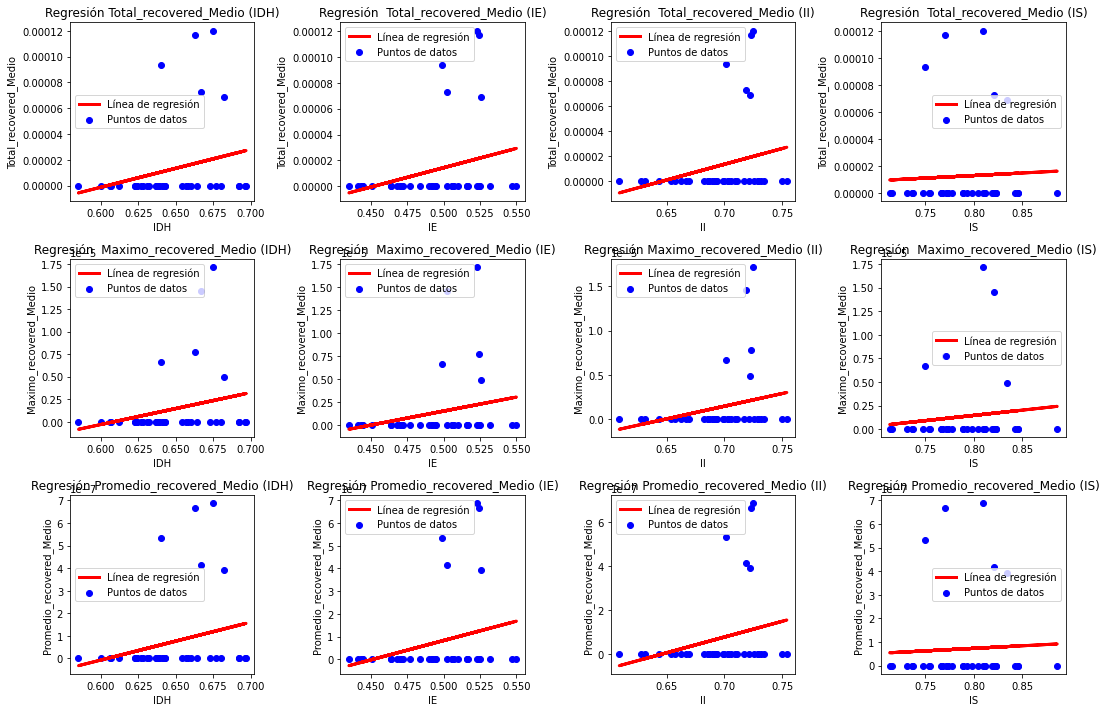

In [39]:
# Función para graficar la línea de regresión
def graficar_linea_regresion(ax, x, y, modelo, etiqueta_x, etiqueta_y, titulo):
    ax.scatter(x, y, color='blue', label='Puntos de datos')
    ax.plot(x, modelo.predict(x), color='red', linewidth=3, label='Línea de regresión')
    ax.set_xlabel(etiqueta_x)
    ax.set_ylabel(etiqueta_y)
    ax.set_title(titulo)
    ax.legend()

# Crear subgráficas en un formato de 3x4
fig, axs = plt.subplots(3, 4, figsize=(15, 10))

# Graficar para Total_pc_recovered_Medio - IDH
graficar_linea_regresion(axs[0, 0], IDH_recovered_Medio, Total_pc_recovered_Medio, modelo_pc_Total_recovered_Medio, 'IDH', 'Total_recovered_Medio', 'Regresión Total_recovered_Medio (IDH)')

# Graficar para Total_pc_recovered_Medio - IE
graficar_linea_regresion(axs[0, 1], IE_recovered_Medio, Total_pc_recovered_Medio, modelo_pc_Total_IE_recovered_Medio, 'IE', 'Total_recovered_Medio', 'Regresión  Total_recovered_Medio (IE)')

# Graficar para Total_pc_recovered_Medio - II
graficar_linea_regresion(axs[0, 2], II_recovered_Medio, Total_pc_recovered_Medio, modelo_pc_Total_II_recovered_Medio, 'II', 'Total_recovered_Medio', 'Regresión  Total_recovered_Medio (II)')

# Graficar para Total_pc_recovered_Medio - IS
graficar_linea_regresion(axs[0, 3], IS_recovered_Medio, Total_pc_recovered_Medio, modelo_pc_Total_IS_recovered_Medio, 'IS', 'Total_recovered_Medio', 'Regresión  Total_recovered_Medio (IS)')

# Graficar para Maximo_pc_recovered_Medio - IDH
graficar_linea_regresion(axs[1, 0], IDH_recovered_Medio, Maximo_pc_recovered_Medio, modelo_pc_Maximo_recovered_Medio, 'IDH', 'Maximo_recovered_Medio', 'Regresión  Maximo_recovered_Medio (IDH)')

# Graficar para Maximo_pc_recovered_Medio - IE
graficar_linea_regresion(axs[1, 1], IE_recovered_Medio, Maximo_pc_recovered_Medio, modelo_pc_Maximo_IE_recovered_Medio, 'IE', 'Maximo_recovered_Medio', 'Regresión  Maximo_recovered_Medio (IE)')

# Graficar para Maximo_pc_recovered_Medio - II
graficar_linea_regresion(axs[1, 2], II_recovered_Medio, Maximo_pc_recovered_Medio, modelo_pc_Maximo_II_recovered_Medio, 'II', 'Maximo_recovered_Medio', 'Regresión Maximo_recovered_Medio (II)')

# Graficar para Maximo_pc_recovered_Medio - IS
graficar_linea_regresion(axs[1, 3], IS_recovered_Medio, Maximo_pc_recovered_Medio, modelo_pc_Maximo_IS_recovered_Medio, 'IS', 'Maximo_recovered_Medio', 'Regresión  Maximo_recovered_Medio (IS)')

# Graficar para Promedio_pc_recovered_Medio - IDH
graficar_linea_regresion(axs[2, 0], IDH_recovered_Medio, Promedio_pc_recovered_Medio, modelo_pc_Promedio_recovered_Medio, 'IDH', 'Promedio_recovered_Medio', 'Regresión Promedio_recovered_Medio (IDH)')

# Graficar para Promedio_pc_recovered_Medio - IE
graficar_linea_regresion(axs[2, 1], IE_recovered_Medio, Promedio_pc_recovered_Medio, modelo_pc_Promedio_IE_recovered_Medio, 'IE', 'Promedio_recovered_Medio', 'Regresión Promedio_recovered_Medio (IE)')

# Graficar para Promedio_pc_recovered_Medio - II
graficar_linea_regresion(axs[2, 2], II_recovered_Medio, Promedio_pc_recovered_Medio, modelo_pc_Promedio_II_recovered_Medio, 'II', 'Promedio_recovered_Medio', 'Regresión Promedio_recovered_Medio (II)')

# Graficar para Promedio_pc_recovered_Medio - IS
graficar_linea_regresion(axs[2, 3], IS_recovered_Medio, Promedio_pc_recovered_Medio, modelo_pc_Promedio_IS_recovered_Medio, 'IS', 'Promedio_recovered_Medio', 'Regresión Promedio_recovered_Medio (IS)')

# Ajustar el diseño de las subgráficas
plt.tight_layout()

# Mostrar las gráficas
plt.show()


# REGRESION LINEAL MULTIPLE

# Regresión Lineal con scikit-learn

## Introducción

El proceso matemático detrás de la regresión lineal implica encontrar el mejor hiperplano que se ajuste a los datos de entrada (X) para predecir la variable de salida (y).

El modelo de regresión lineal se expresa matemáticamente como:

$$ y = b_0 + b_1x_1 + b_2x_2 + \ldots + b_nx_n $$

Donde:
- $y$ es la variable dependiente que estamos tratando de predecir.
- $b_0$ es el intercepto.
- $b_1, b_2, \ldots, b_n$ son los coeficientes que representan la contribución de cada variable independiente $x_1, x_2, \ldots, x_n$ en la predicción de $y$.

El objetivo de ajustar el modelo es encontrar los valores óptimos para $b_0, b_1, \ldots, b_n$ de manera que minimicen la diferencia entre las predicciones del modelo ($y_{\text{pred}}$) y los valores reales observados ($y$).

## Interpretación de los Resultados

- `modelo_multivariable_maximo.coef_` devuelve los coeficientes $b_1, b_2, \ldots, b_n$.
- `modelo_multivariable_maximo.intercept_` devuelve el intercepto $b_0$.
- $R^2$ (coeficiente de determinación) se calcula para evaluar qué tan bien el modelo se ajusta a los datos. El $R^2$ indica la proporción de la varianza en la variable dependiente que es predecible a partir de las variables independientes.

El proceso matemático detrás de scikit-learn's LinearRegression es encontrar los coeficientes y el intercepto que minimizan la diferencia entre las predicciones del modelo y los valores reales observados. 



In [183]:
data_multivariable = pd.DataFrame({'II_defunciones_Alto': df_deaths_alto['II'], 
                                   'Maximo_per_capita': df_deaths_alto['Maximo_per_capita_deaths'], 
                                   'IS_confirmados_Alto': df_confirmed_alto['IS'], 
                                   'Total_confirmados_alto': df_confirmed_alto['Total_per_capita']})
data_multivariable

,II_defunciones_Alto,Maximo_per_capita,IS_confirmados_Alto,Total_confirmados_alto
5,0.783,0.000019,0.850,0.006363
8,0.733,0.000041,0.871,0.005586
12,0.799,0.000021,0.844,0.006288
14,0.777,0.000015,0.901,0.007211
17,0.791,0.000017,0.904,0.007899
19,0.762,0.000021,0.908,0.009014
25,0.748,0.000040,0.934,0.008862
30,0.744,0.000033,0.818,0.003193


In [184]:
# Separar las variables independientes (X) y la variable dependiente (y)
X = data_multivariable[['II_defunciones_Alto', 'IS_confirmados_Alto']]
y_total = data_multivariable['Total_confirmados_alto']

In [185]:
# Crear una instancia de LinearRegression
modelo_multivariable_total = LinearRegression()

# Ajustar el modelo a los datos
modelo_multivariable_total.fit(X, y_total)
# Realizar predicciones
y_pred = modelo_multivariable_total.predict(X)

# Calcular el valor R cuadrado
r2 = r2_score(y_total, y_pred)

# Imprimir coeficientes, intercepto y R cuadrado
print('Coeficientes:', modelo_multivariable_total.coef_)
print('Intercepto:', modelo_multivariable_total.intercept_)
print('R cuadrado:', r2)



Coeficientes: [0.02321358 0.04442535]
Intercepto: -0.05004450659805759
R cuadrado: 0.9016596265670326


### El análisis revela que el coeficiente para el Índice de Ingresos (II) es de 0.0232, mientras que el coeficiente para el Índice de Salud (IS) es de 0.0444. Estos valores representan el cambio esperado en el número total de defunciones per capita por cada unidad de cambio en la variable independiente correspondiente. 

### Un aumento de una unidad en II se relaciona con un incremento de 0.0232 en defunciones, y en IS con un aumento de 0.0444, manteniendo constante la otra variable independiente.

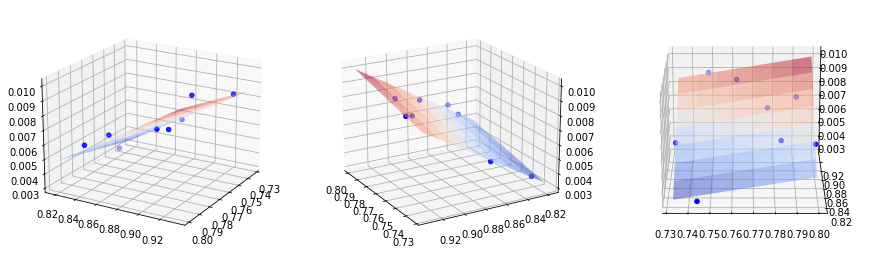

In [186]:
# Creamos una malla de valores para II_defunciones_Alto e IS_confirmados_Alto
x_vals = np.linspace(X['II_defunciones_Alto'].min(), X['II_defunciones_Alto'].max(), len(X))
y_vals = np.linspace(X['IS_confirmados_Alto'].min(), X['IS_confirmados_Alto'].max(), len(X))
x_mesh, y_mesh = np.meshgrid(x_vals, y_vals)

# Calculamos los valores correspondientes de Total_confirmados_alto usando el modelo
z = modelo_multivariable_total.intercept_ + modelo_multivariable_total.coef_[0]*x_mesh + modelo_multivariable_total.coef_[1]*y_mesh
# Crear tres subparcelas en una fila y tres columnas
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), subplot_kw={'projection': '3d'})

# Configurar la vista para cada subparcela
views = [(20, 30), (20, 150), (20, 270)]  

for ax, view in zip(axes, views):
    ax.scatter(X['II_defunciones_Alto'], X['IS_confirmados_Alto'], y_total, color='blue')
    ax.plot_surface(x_mesh, y_mesh, z, cmap=cm.coolwarm, alpha=0.5)
    ax.view_init(elev=view[0], azim=view[1])

plt.show()

In [178]:
# Separar las variables independientes (X) y la variable dependiente (y)
X = data_multivariable[['II_defunciones_Alto', 'IS_confirmados_Alto']]
y_maximo = data_multivariable['Maximo_per_capita']

# Crear una instancia de LinearRegression
modelo_multivariable_maximo = LinearRegression()

# Ajustar el modelo a los datos
modelo_multivariable_maximo.fit(X, y_maximo)
# Realizar predicciones
y_pred_maximo = modelo_multivariable_maximo.predict(X)

# Calcular el valor R cuadrado
r2_maximo = r2_score(y_maximo, y_pred_maximo)

# Imprimir coeficientes, intercepto y R cuadrado
print('Coeficientes:', modelo_multivariable_maximo.coef_)
print('Intercepto:', modelo_multivariable_maximo.intercept_)
print('R cuadrado:', r2_maximo)


Coeficientes: [-3.81732172e-04 -1.10310844e-05]
Intercepto: 0.000328469218071636
R cuadrado: 0.7515817394860398


### El análisis revela que el coeficiente para el Índice de Ingresos (II) es de -3.81732172e-04, mientras que el coeficiente para el Índice de Salud (IS) es de -1.10310844e-05. Estos valores representan el cambio esperado en el número total de defunciones per capita por cada unidad de cambio en la variable independiente correspondiente. 

### Un aumento de una unidad en II se relaciona con un incremento de -3.81732172e-04 en defunciones, y en IS con un aumento de -1.10310844e-05, manteniendo constante la otra variable independiente.

Para la primera variable independiente II: Un cambio de una unidad en la primera variable se relaciona con un cambio esperado de aproximadamente -0.00038 en la variable que estamos tratando de predecir (la variable dependiente). En términos más simples, si la primera variable (Indice de Ingresos) aumenta en una unidad, esperamos que la variable dependiente disminuya en alrededor de 0.00038 unidades, en otras palabras que el numero total per capita de confirmados disminuya.

Para la segunda variable independiente IS: Un cambio de una unidad en la segunda variable se relaciona con un cambio esperado de aproximadamente -0.000011 en la variable dependiente, si la segunda variable aumenta en una unidad, esperamos que la variable dependiente, total de casos confirmados per capita, disminuya en alrededor de 0.000011 unidades.

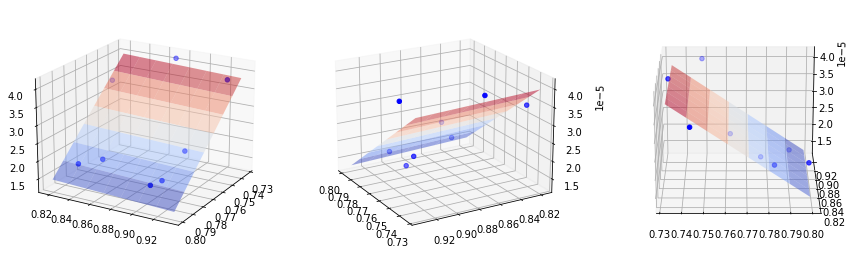

In [179]:
# Creamos una malla de valores para II_defunciones_Alto e IS_confirmados_Alto
x_vals = np.linspace(X['II_defunciones_Alto'].min(), X['II_defunciones_Alto'].max(), len(X))
y_vals = np.linspace(X['IS_confirmados_Alto'].min(), X['IS_confirmados_Alto'].max(), len(X))
x_mesh, y_mesh = np.meshgrid(x_vals, y_vals)

# Calcular los valores correspondientes de Maximo_per_capita usando el modelo
z_maximo = modelo_multivariable_maximo.intercept_ + modelo_multivariable_maximo.coef_[0]*x_mesh + modelo_multivariable_maximo.coef_[1]*y_mesh

# Crear tres subparcelas en una fila y tres columnas para mejor visualizacion
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), subplot_kw={'projection': '3d'})

# Configurar la vista para cada subparcela
views = [(20, 30), (20, 150), (20, 270)]  

for ax, view in zip(axes, views):
    ax.scatter(X['II_defunciones_Alto'], X['IS_confirmados_Alto'], y_maximo, color='blue')
    ax.plot_surface(x_mesh, y_mesh, z_maximo, cmap=cm.coolwarm, alpha=0.5)
    ax.view_init(elev=view[0], azim=view[1])

plt.show()